In [6]:
# Pursope: To help taxi aggregator company to address driver attrition by bringing the data driven insights / decision strategies

In [7]:
# Approach: In this notebook all records are considered as independent records (driver id based aggregations are not done in this notebook) 
# more importance is given for building machine learning models and compare the performance rather than real business insights (as it is an academic project)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve,auc
from imblearn.over_sampling import SMOTE

In [9]:
df1 = pd.read_csv('ola_driver_scaler.csv')
df=df1.copy()
print(df.head())

   Unnamed: 0    MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
0           0  01/01/19          1  28.0     0.0  C23                2   
1           1  02/01/19          1  28.0     0.0  C23                2   
2           2  03/01/19          1  28.0     0.0  C23                2   
3           3  11/01/20          2  31.0     0.0   C7                2   
4           4  12/01/20          2  31.0     0.0   C7                2   

   Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0   57387      24/12/18             NaN                    1      1   
1   57387      24/12/18             NaN                    1      1   
2   57387      24/12/18        03/11/19                    1      1   
3   67016      11/06/20             NaN                    2      2   
4   67016      11/06/20             NaN                    2      2   

   Total Business Value  Quarterly Rating  
0               2381060                 2  
1               -665480                 

In [10]:
print(df.shape)

(19104, 14)


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB
None


In [12]:
df.rename(columns={'MMM-YY': 'Reporting Date'}, inplace=True)

In [13]:
df.head()

,Unnamed: 0,Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [14]:
print(df.describe())

         Unnamed: 0     Driver_ID           Age        Gender  \
count  19104.000000  19104.000000  19043.000000  19052.000000   
mean    9551.500000   1415.591133     34.668435      0.418749   
std     5514.994107    810.705321      6.257912      0.493367   
min        0.000000      1.000000     21.000000      0.000000   
25%     4775.750000    710.000000     30.000000      0.000000   
50%     9551.500000   1417.000000     34.000000      0.000000   
75%    14327.250000   2137.000000     39.000000      1.000000   
max    19103.000000   2788.000000     58.000000      1.000000   

       Education_Level         Income  Joining Designation         Grade  \
count     19104.000000   19104.000000         19104.000000  19104.000000   
mean          1.021671   65652.025126             1.690536      2.252670   
std           0.800167   30914.515344             0.836984      1.026512   
min           0.000000   10747.000000             1.000000      1.000000   
25%           0.000000   42383.000

In [15]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format='%d/%m/%y')


In [16]:
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], format='%d/%m/%y')

In [17]:
df['Reporting Date'] = pd.to_datetime(df['Reporting Date'], format='%d/%m/%y')

In [18]:
# Extract year and month from the Reporting Date
df['ReportingYear'] = df['Reporting Date'].dt.year
df['ReportingMonth'] = df['Reporting Date'].dt.month
df['ReportingDay'] = df['Reporting Date'].dt.day

In [19]:
df.head()

,Unnamed: 0,Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,ReportingMonth,ReportingDay
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,2019,1,1
1,1,2019-01-02,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2019,1,2
2,2,2019-01-03,1,28.0,0.0,C23,2,57387,2018-12-24,2019-11-03,1,1,0,2,2019,1,3
3,3,2020-01-11,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,2020,1,11
4,4,2020-01-12,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,2020,1,12


In [20]:
df.drop(columns=['Reporting Date'], inplace=True)

In [21]:
df.head()

,Unnamed: 0,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,ReportingMonth,ReportingDay
0,0,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,2019,1,1
1,1,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2019,1,2
2,2,1,28.0,0.0,C23,2,57387,2018-12-24,2019-11-03,1,1,0,2,2019,1,3
3,3,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,2020,1,11
4,4,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,2020,1,12


In [22]:
df['Target'] = df['LastWorkingDate'].notnull().astype(int)

In [23]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                  0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
ReportingYear               0
ReportingMonth              0
ReportingDay                0
Target                      0
dtype: int64


In [24]:
df.head()

,Unnamed: 0,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,ReportingMonth,ReportingDay,Target
0,0,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,2019,1,1,0
1,1,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2019,1,2,0
2,2,1,28.0,0.0,C23,2,57387,2018-12-24,2019-11-03,1,1,0,2,2019,1,3,1
3,3,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,2020,1,11,0
4,4,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,2020,1,12,0


In [25]:
# Target encoding of City

In [26]:
# Calculate the mean of the target for each city
city_target_mean = df.groupby('City')['Target'].mean()

In [27]:
# Map the calculated mean to the City column
df['City_Target_Encoded'] = df['City'].map(city_target_mean)

In [28]:
df.head()

,Unnamed: 0,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,ReportingMonth,ReportingDay,Target,City_Target_Encoded
0,0,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,2019,1,1,0,0.105948
1,1,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2019,1,2,0,0.105948
2,2,1,28.0,0.0,C23,2,57387,2018-12-24,2019-11-03,1,1,0,2,2019,1,3,1,0.105948
3,3,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,2020,1,11,0,0.085386
4,4,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,2020,1,12,0,0.085386


In [29]:
df['City'].nunique()

29

In [30]:
df['City'].value_counts()

City
C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: count, dtype: int64

In [31]:
df['City_Target_Encoded']

0        0.105948
1        0.105948
2        0.105948
3        0.085386
4        0.085386
           ...   
19099    0.076336
19100    0.076336
19101    0.076336
19102    0.076336
19103    0.076336
Name: City_Target_Encoded, Length: 19104, dtype: float64

In [32]:
df['City_Target_Encoded'].nunique() # There are 29 unique cities; these have been target encoded

29

In [33]:
df['City_Target_Encoded'].value_counts()

City_Target_Encoded
0.110119    1008
0.056667     900
0.074799     869
0.061805     809
0.076336     786
0.090670     761
0.081989     744
0.072902     727
0.074438     712
0.070522     709
0.086384     683
0.082718     677
0.083333     660
0.073171     656
0.089506     648
0.081633     637
0.083062     614
0.085386     609
0.079602     603
0.092466     584
0.070812     579
0.089965     578
0.101933     569
0.080882     544
0.105948     538
0.101923     520
0.116525     472
0.096154     468
0.125000     440
Name: count, dtype: int64

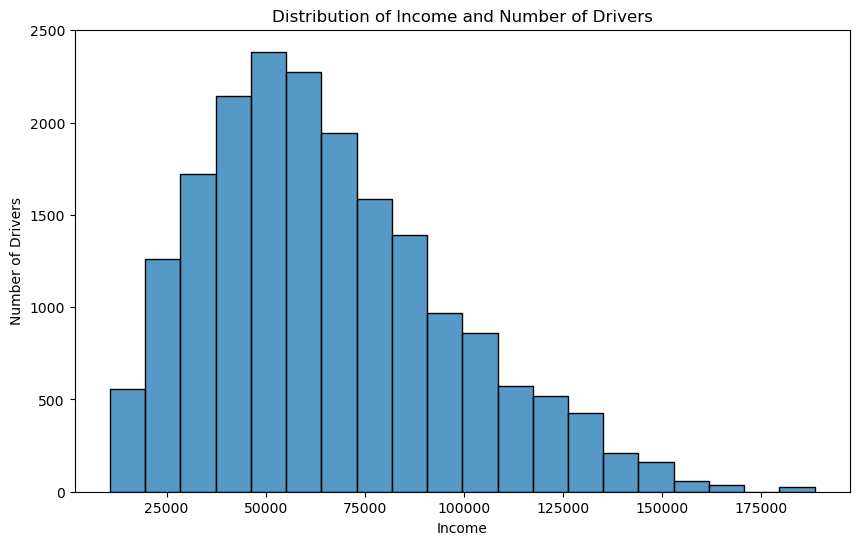

In [34]:
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.histplot(data=df, x='Income', bins=20, kde=False)  # kde=False means we won't add a kernel density estimate
plt.title('Distribution of Income and Number of Drivers')
plt.xlabel('Income')
plt.ylabel('Number of Drivers')
plt.show()

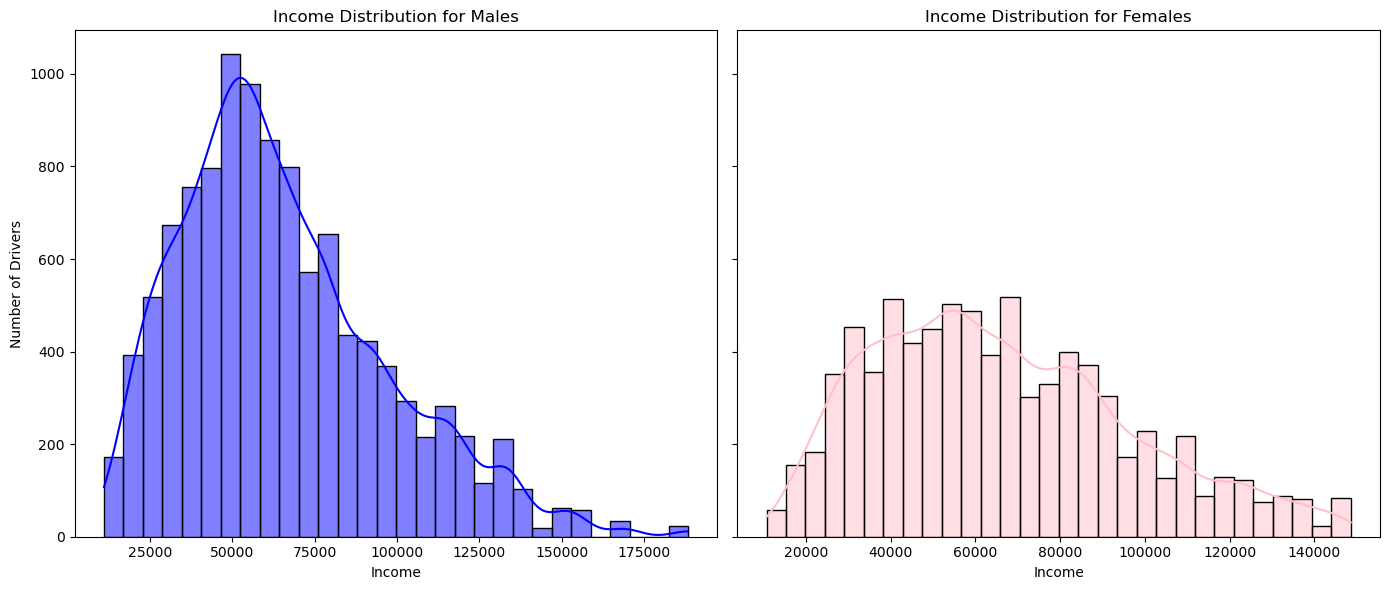

In [35]:
# Filter data for males and females
df_male = df[df['Gender'] == 0]
df_female = df[df['Gender'] == 1]

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Males
sns.histplot(df_male['Income'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Income Distribution for Males')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Number of Drivers')

# Plot for Females
sns.histplot(df_female['Income'], bins=30, kde=True, ax=axes[1], color='pink')
axes[1].set_title('Income Distribution for Females')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Number of Drivers')

plt.tight_layout()
plt.show()

### Female drivers have relatively lower income

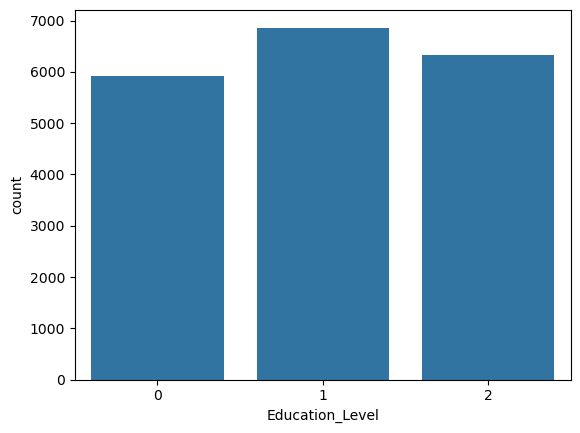

In [36]:
sns.countplot(x='Education_Level', data=df)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20608\1920163869.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education_Level', data=df_male, ax=axes[0], palette='Blues')
C:\Users\Dell\AppData\Local\Temp\ipykernel_20608\1920163869.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['10+', '12+', 'Graduate'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_20608\1920163869.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education_Level', data=df_female, ax=axes[1], palette='Purples')
C:\Users\Dell\AppData\Local\Temp\ipykernel_20608\1920163869.py:16: UserWarning: set_tickl

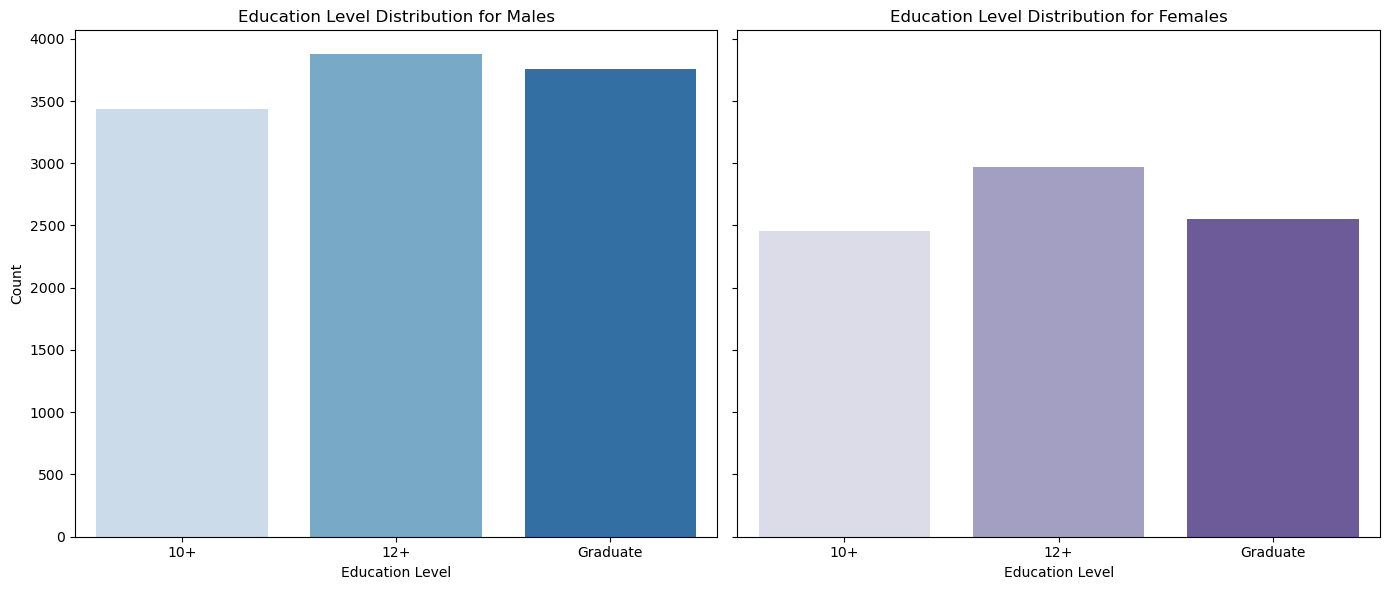

In [37]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Males
sns.countplot(x='Education_Level', data=df_male, ax=axes[0], palette='Blues')
axes[0].set_title('Education Level Distribution for Males')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['10+', '12+', 'Graduate'])

# Plot for Females
sns.countplot(x='Education_Level', data=df_female, ax=axes[1], palette='Purples')
axes[1].set_title('Education Level Distribution for Females')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['10+', '12+', 'Graduate'])

plt.tight_layout()
plt.show()

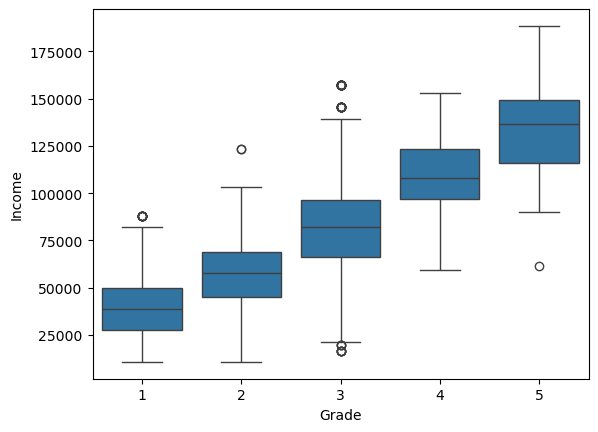

In [38]:
sns.boxplot(x='Grade', y='Income', data=df)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20608\2679726086.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grade', y='Income', data=df_male, ax=axes[0], palette='Blues')
C:\Users\Dell\AppData\Local\Temp\ipykernel_20608\2679726086.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grade', y='Income', data=df_female, ax=axes[1], palette='Purples')


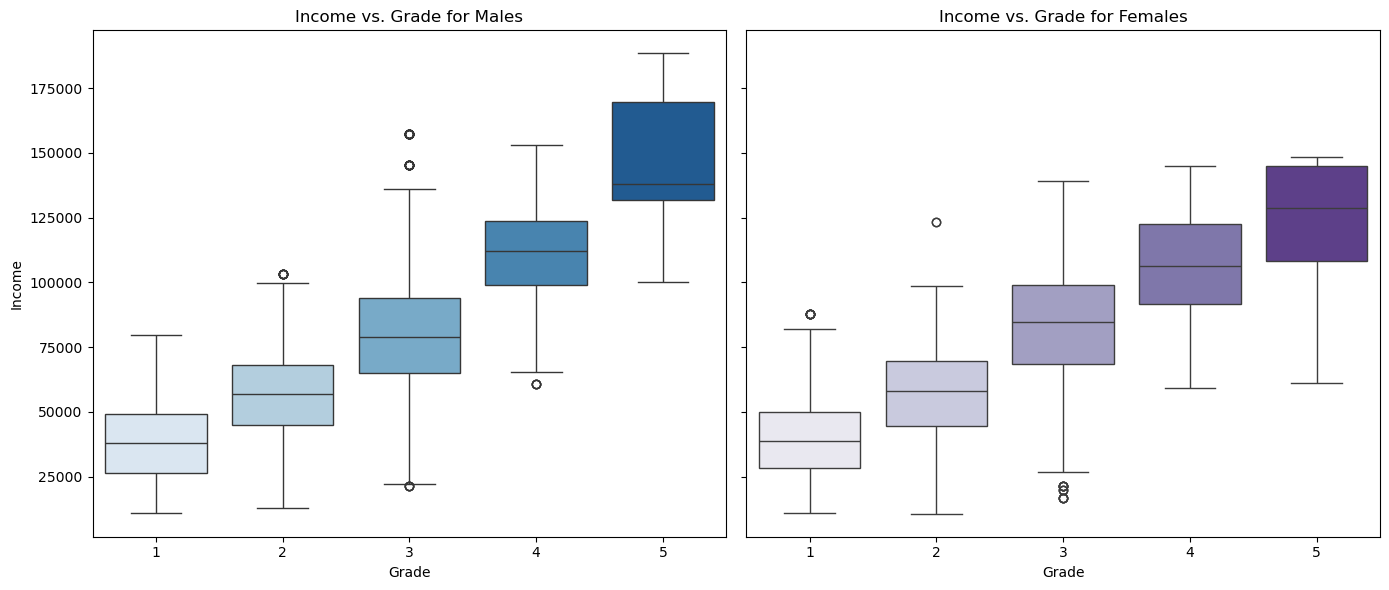

In [39]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Boxplot for Males
sns.boxplot(x='Grade', y='Income', data=df_male, ax=axes[0], palette='Blues')
axes[0].set_title('Income vs. Grade for Males')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Income')

# Boxplot for Females
sns.boxplot(x='Grade', y='Income', data=df_female, ax=axes[1], palette='Purples')
axes[1].set_title('Income vs. Grade for Females')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Income')

plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20608\4190791469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Grade', data=df_male, ax=axes[0], palette='Blues')
C:\Users\Dell\AppData\Local\Temp\ipykernel_20608\4190791469.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Grade', data=df_female, ax=axes[1], palette='Purples')


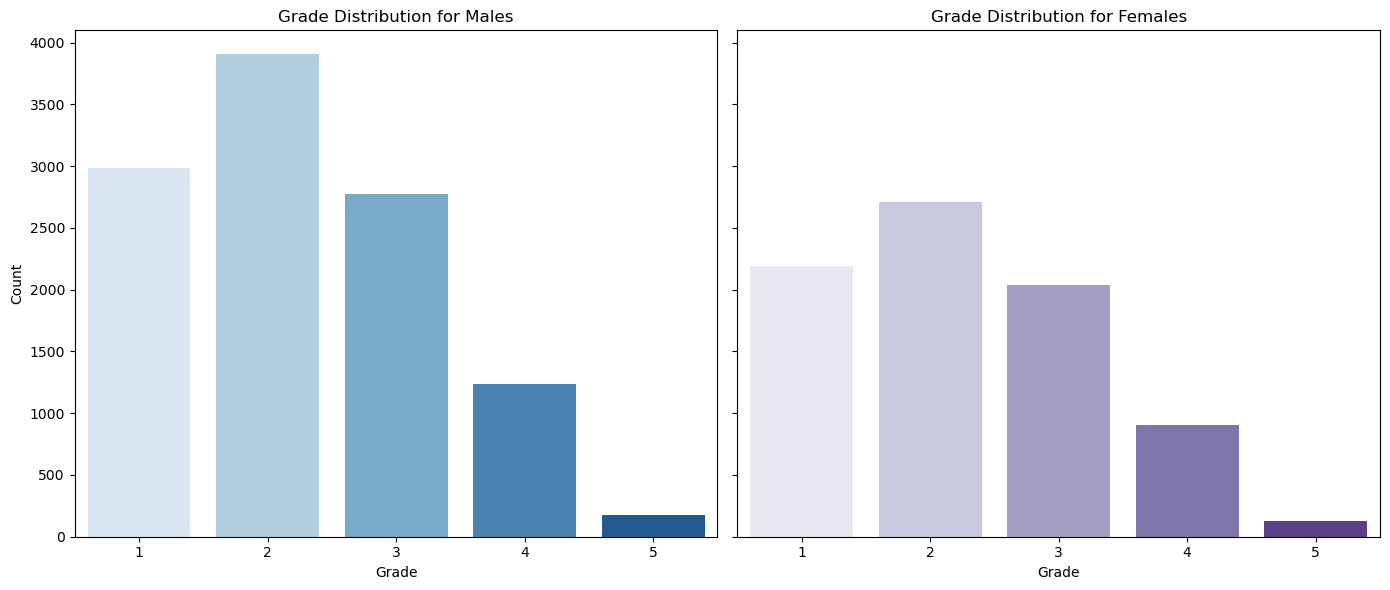

In [40]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Males
sns.countplot(x='Grade', data=df_male, ax=axes[0], palette='Blues')
axes[0].set_title('Grade Distribution for Males')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Count')

# Plot for Females
sns.countplot(x='Grade', data=df_female, ax=axes[1], palette='Purples')
axes[1].set_title('Grade Distribution for Females')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [41]:
# Count the number of male and female drivers
gender_counts = df['Gender'].value_counts()

# Print the counts
print(f"Number of male drivers: {gender_counts[0]}")
print(f"Number of female drivers: {gender_counts[1]}")

Number of male drivers: 11074
Number of female drivers: 7978


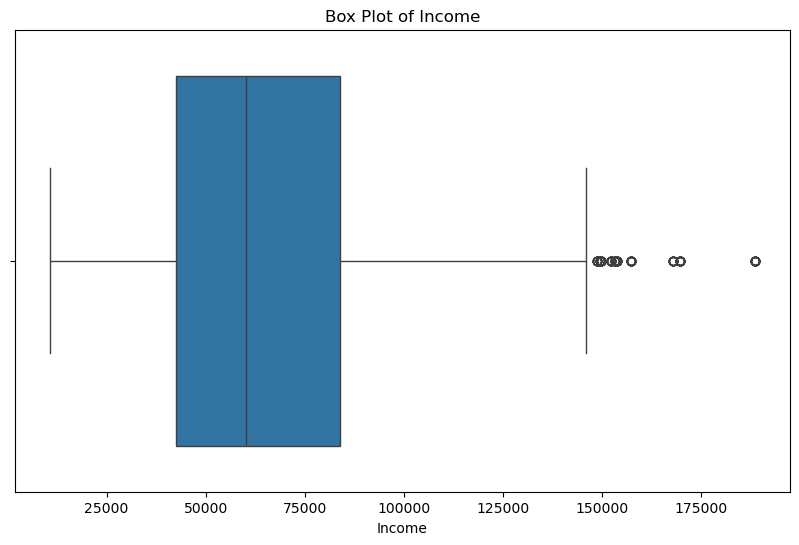

In [42]:
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.boxplot(data=df, x='Income')
plt.title('Box Plot of Income')
plt.xlabel('Income')
plt.show()

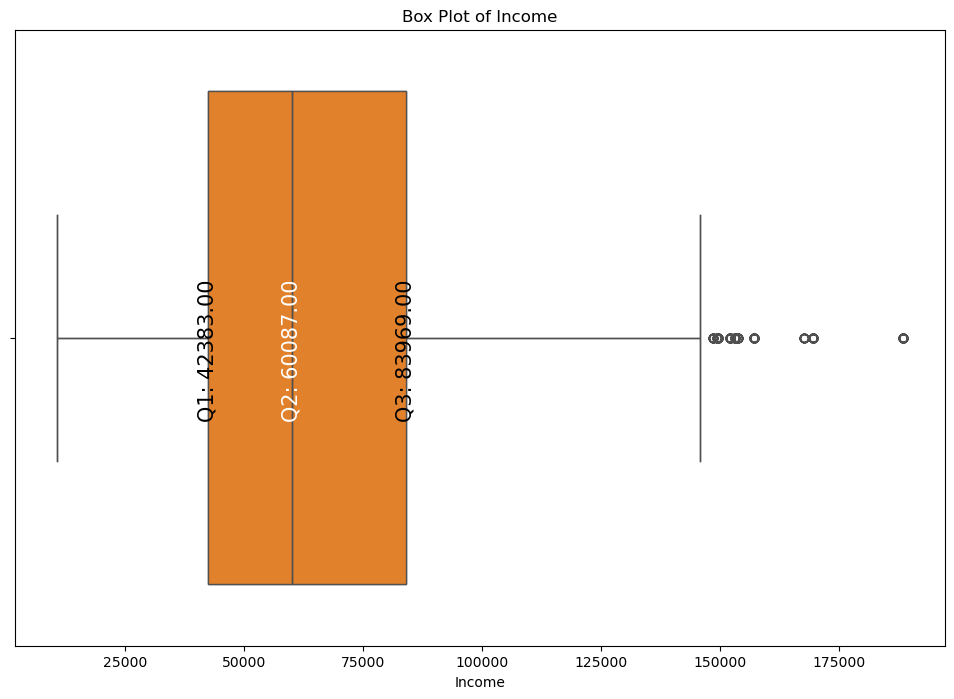

In [43]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Income')
plt.title('Box Plot of Income')
plt.xlabel('Income')

boxplot = sns.boxplot(data=df, x='Income')

# Calculate Q1, Q2 (median), and Q3
Q1 = df['Income'].quantile(0.25)
Q2 = df['Income'].median()
Q3 = df['Income'].quantile(0.75)

# Adding the annotations for Q1, Q2, and Q3
plt.text(Q1, 0.02, f'Q1: {Q1:.2f}', ha='center', va='center', color='black', fontsize=15, rotation=90)
plt.text(Q2, 0.02, f'Q2: {Q2:.2f}', ha='center', va='center', color='white', fontsize=15, rotation=90)
plt.text(Q3, 0.02, f'Q3: {Q3:.2f}', ha='center', va='center', color='black', fontsize=15, rotation=90)


# Display the plot
plt.show()

#### median income of drivers is 60087.00; there are a few drivers who earn as much as 150000.00 and more
#### better the grade more the income
#### we have almost same number of drivers across different education levels
#### number of drivers who earn more than 100000.00 is also significant
#### missing value imputation is done. however outlier treatment is not done...

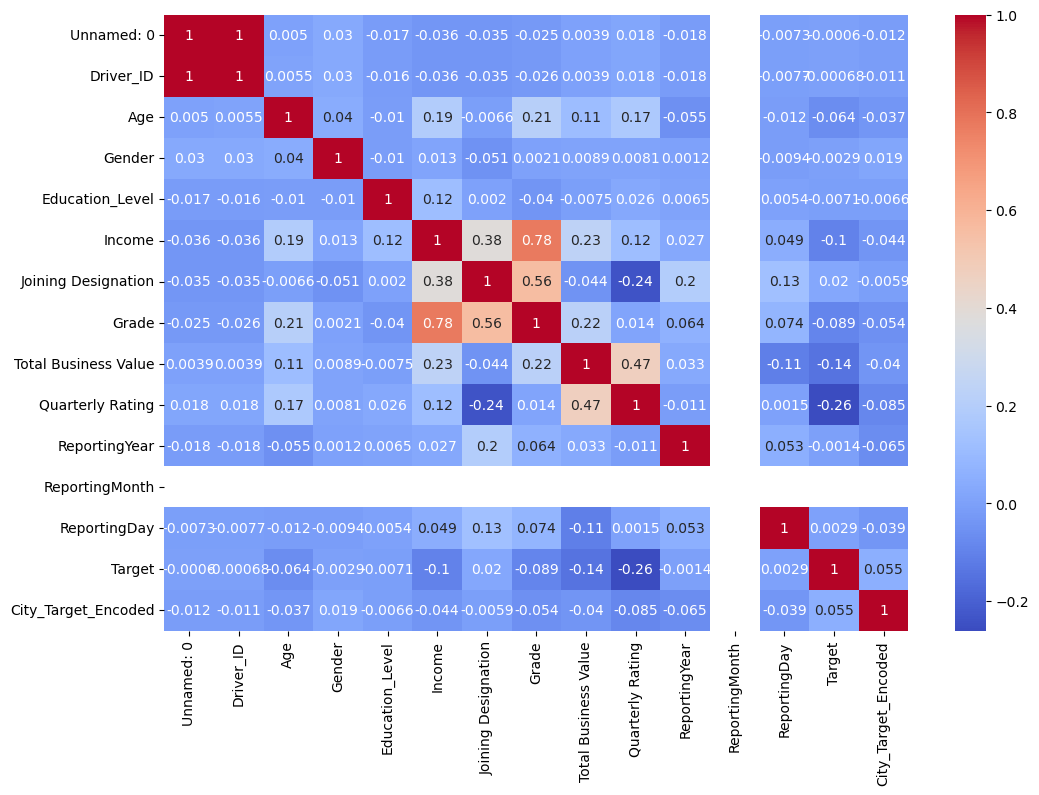

In [44]:
# Select only the numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [45]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                  0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
ReportingYear               0
ReportingMonth              0
ReportingDay                0
Target                      0
City_Target_Encoded         0
dtype: int64


#### 52 missing values in Gender column; this may not be accidental or by mistake; they could be 3rd gender people - it makes sense to study only these records seperately (anyway, not done in this notebook);  neverthless we are going to use knn imputer to impute missing values.

In [46]:
# Perform KNN imputation on numerical features to handle missing values.

In [47]:
imputer = KNNImputer(n_neighbors=5)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [48]:
df.head()

,Unnamed: 0,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,ReportingMonth,ReportingDay,Target,City_Target_Encoded
0,0.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,2381060.0,2.0,2019,1,1,0,0.105948
1,1.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,-665480.0,2.0,2019,1,2,0,0.105948
2,2.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-11-03,1.0,1.0,0.0,2.0,2019,1,3,1,0.105948
3,3.0,2.0,31.0,0.0,C7,2.0,67016.0,2020-06-11,NaT,2.0,2.0,0.0,1.0,2020,1,11,0,0.085386
4,4.0,2.0,31.0,0.0,C7,2.0,67016.0,2020-06-11,NaT,2.0,2.0,0.0,1.0,2020,1,12,0,0.085386


In [49]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                  0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
ReportingYear               0
ReportingMonth              0
ReportingDay                0
Target                      0
City_Target_Encoded         0
dtype: int64


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  float64       
 1   Driver_ID             19104 non-null  float64       
 2   Age                   19104 non-null  float64       
 3   Gender                19104 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  float64       
 6   Income                19104 non-null  float64       
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  float64       
 10  Grade                 19104 non-null  float64       
 11  Total Business Value  19104 non-null  float64       
 12  Quarterly Rating      19104 non-null  float64       
 13  ReportingYear   

In [51]:
# Calculate total number of male and female drivers
total_males = df[df['Gender'] == 0].shape[0]
total_females = df[df['Gender'] == 1].shape[0]

# Calculate number of male and female drivers who have left (attrition)
attrition_males = df[(df['Gender'] == 0) & (df['Target'] == 1)].shape[0]
attrition_females = df[(df['Gender'] == 1) & (df['Target'] == 1)].shape[0]

# Calculate attrition percentages
attrition_percentage_males = (attrition_males / total_males) * 100
attrition_percentage_females = (attrition_females / total_females) * 100

# Print the results
print(f"Percentage of attrition for male drivers: {attrition_percentage_males:.2f}%")
print(f"Percentage of attrition for female drivers: {attrition_percentage_females:.2f}%")

Percentage of attrition for male drivers: 8.54%
Percentage of attrition for female drivers: 8.36%


In [52]:
# Calculate total number of drivers
total_drivers = df.shape[0]

# Calculate total number of drivers who have left (attrition)
total_attrition = df[df['Target'] == 1].shape[0]

# Calculate overall attrition percentage
overall_attrition_percentage = (total_attrition / total_drivers) * 100

# Print the result
print(f"Overall percentage of attrition: {overall_attrition_percentage:.2f}%")

Overall percentage of attrition: 8.46%


In [53]:
print("total_males   : ", total_males)
print("total_females : ", total_females)

total_males   :  11087
total_females :  7981


In [54]:
# Feature Engineering:


In [55]:
df['Rating_Increase'] = (df['Quarterly Rating'] > df['Quarterly Rating'].shift(1)).astype(int)

In [56]:
df['Income_Increase'] = (df['Income'] > df['Income'].shift(1)).astype(int)

In [57]:
df.head()

,Unnamed: 0,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,ReportingMonth,ReportingDay,Target,City_Target_Encoded,Rating_Increase,Income_Increase
0,0.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,2381060.0,2.0,2019,1,1,0,0.105948,0,0
1,1.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,-665480.0,2.0,2019,1,2,0,0.105948,0,0
2,2.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-11-03,1.0,1.0,0.0,2.0,2019,1,3,1,0.105948,0,0
3,3.0,2.0,31.0,0.0,C7,2.0,67016.0,2020-06-11,NaT,2.0,2.0,0.0,1.0,2020,1,11,0,0.085386,0,1
4,4.0,2.0,31.0,0.0,C7,2.0,67016.0,2020-06-11,NaT,2.0,2.0,0.0,1.0,2020,1,12,0,0.085386,0,0


In [58]:
df.head()

,Unnamed: 0,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,ReportingMonth,ReportingDay,Target,City_Target_Encoded,Rating_Increase,Income_Increase
0,0.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,2381060.0,2.0,2019,1,1,0,0.105948,0,0
1,1.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,-665480.0,2.0,2019,1,2,0,0.105948,0,0
2,2.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-11-03,1.0,1.0,0.0,2.0,2019,1,3,1,0.105948,0,0
3,3.0,2.0,31.0,0.0,C7,2.0,67016.0,2020-06-11,NaT,2.0,2.0,0.0,1.0,2020,1,11,0,0.085386,0,1
4,4.0,2.0,31.0,0.0,C7,2.0,67016.0,2020-06-11,NaT,2.0,2.0,0.0,1.0,2020,1,12,0,0.085386,0,0


In [59]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                  0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
ReportingYear               0
ReportingMonth              0
ReportingDay                0
Target                      0
City_Target_Encoded         0
Rating_Increase             0
Income_Increase             0
dtype: int64


In [60]:
df['LastWorkingDate'].isna().sum()

17488

In [61]:
df.head(100)

,Unnamed: 0,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,ReportingMonth,ReportingDay,Target,City_Target_Encoded,Rating_Increase,Income_Increase
0,0.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,2381060.0,2.0,2019,1,1,0,0.105948,0,0
1,1.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,-665480.0,2.0,2019,1,2,0,0.105948,0,0
2,2.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-11-03,1.0,1.0,0.0,2.0,2019,1,3,1,0.105948,0,0
3,3.0,2.0,31.0,0.0,C7,2.0,67016.0,2020-06-11,NaT,2.0,2.0,0.0,1.0,2020,1,11,0,0.085386,0,1
4,4.0,2.0,31.0,0.0,C7,2.0,67016.0,2020-06-11,NaT,2.0,2.0,0.0,1.0,2020,1,12,0,0.085386,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95.0,22.0,40.0,0.0,C10,2.0,31224.0,2018-05-25,NaT,1.0,1.0,1120560.0,4.0,2019,1,8,0,0.081989,0,0
96,96.0,22.0,40.0,0.0,C10,2.0,31224.0,2018-05-25,NaT,1.0,1.0,696920.0,4.0,2019,1,9,0,0.081989,0,0
97,97.0,22.0,34.2,0.0,C10,2.0,31224.0,2018-05-25,NaT,1.0,1.0,200000.0,3.0,2019,1,10,0,0.081989,0,0
98,98.0,22.0,41.0,0.0,C10,2.0,31224.0,2018-05-25,NaT,1.0,1.0,306410.0,3.0,2019,1,11,0,0.081989,0,0


In [62]:
df.tail(100)

,Unnamed: 0,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,ReportingMonth,ReportingDay,Target,City_Target_Encoded,Rating_Increase,Income_Increase
19004,19004.0,2771.0,40.0,0.0,C12,0.0,91456.0,2015-08-29,NaT,2.0,4.0,770090.0,2.0,2020,1,7,0,0.072902,0,0
19005,19005.0,2771.0,40.0,0.0,C12,0.0,91456.0,2015-08-29,NaT,2.0,4.0,660230.0,2.0,2020,1,8,0,0.072902,0,0
19006,19006.0,2771.0,40.0,0.0,C12,0.0,91456.0,2015-08-29,NaT,2.0,4.0,401530.0,2.0,2020,1,9,0,0.072902,0,0
19007,19007.0,2771.0,40.0,0.0,C12,0.0,91456.0,2015-08-29,NaT,2.0,4.0,120800.0,1.0,2020,1,10,0,0.072902,0,0
19008,19008.0,2771.0,40.0,0.0,C12,0.0,91456.0,2015-08-29,NaT,2.0,4.0,0.0,1.0,2020,1,11,0,0.072902,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099.0,2788.0,30.0,0.0,C27,2.0,70254.0,2020-08-06,NaT,2.0,2.0,740280.0,3.0,2020,1,8,0,0.076336,0,0
19100,19100.0,2788.0,30.0,0.0,C27,2.0,70254.0,2020-08-06,NaT,2.0,2.0,448370.0,3.0,2020,1,9,0,0.076336,0,0
19101,19101.0,2788.0,30.0,0.0,C27,2.0,70254.0,2020-08-06,NaT,2.0,2.0,0.0,2.0,2020,1,10,0,0.076336,0,0
19102,19102.0,2788.0,30.0,0.0,C27,2.0,70254.0,2020-08-06,NaT,2.0,2.0,200420.0,2.0,2020,1,11,0,0.076336,0,0


In [63]:
df.head()

,Unnamed: 0,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,ReportingMonth,ReportingDay,Target,City_Target_Encoded,Rating_Increase,Income_Increase
0,0.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,2381060.0,2.0,2019,1,1,0,0.105948,0,0
1,1.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,-665480.0,2.0,2019,1,2,0,0.105948,0,0
2,2.0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-11-03,1.0,1.0,0.0,2.0,2019,1,3,1,0.105948,0,0
3,3.0,2.0,31.0,0.0,C7,2.0,67016.0,2020-06-11,NaT,2.0,2.0,0.0,1.0,2020,1,11,0,0.085386,0,1
4,4.0,2.0,31.0,0.0,C7,2.0,67016.0,2020-06-11,NaT,2.0,2.0,0.0,1.0,2020,1,12,0,0.085386,0,0


In [64]:
df.drop(columns=['City'],inplace=True)

In [65]:
df.head()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,ReportingMonth,ReportingDay,Target,City_Target_Encoded,Rating_Increase,Income_Increase
0,0.0,1.0,28.0,0.0,2.0,57387.0,2018-12-24,NaT,1.0,1.0,2381060.0,2.0,2019,1,1,0,0.105948,0,0
1,1.0,1.0,28.0,0.0,2.0,57387.0,2018-12-24,NaT,1.0,1.0,-665480.0,2.0,2019,1,2,0,0.105948,0,0
2,2.0,1.0,28.0,0.0,2.0,57387.0,2018-12-24,2019-11-03,1.0,1.0,0.0,2.0,2019,1,3,1,0.105948,0,0
3,3.0,2.0,31.0,0.0,2.0,67016.0,2020-06-11,NaT,2.0,2.0,0.0,1.0,2020,1,11,0,0.085386,0,1
4,4.0,2.0,31.0,0.0,2.0,67016.0,2020-06-11,NaT,2.0,2.0,0.0,1.0,2020,1,12,0,0.085386,0,0


In [66]:
df.drop(columns=['Driver_ID', 'Dateofjoining', 'LastWorkingDate'],inplace=True)

In [67]:
df.head()

,Unnamed: 0,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,ReportingMonth,ReportingDay,Target,City_Target_Encoded,Rating_Increase,Income_Increase
0,0.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019,1,1,0,0.105948,0,0
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019,1,2,0,0.105948,0,0
2,2.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019,1,3,1,0.105948,0,0
3,3.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020,1,11,0,0.085386,0,1
4,4.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020,1,12,0,0.085386,0,0


In [68]:
y = df['Target']

In [69]:
y.value_counts()

Target
0    17488
1     1616
Name: count, dtype: int64

### As we see, there is class imbalance problem in the dataset ; we will use SMOTE for balancing the dataset

In [70]:
# Drop column target
X = df.drop(columns=['Target'])

In [71]:
X.head()

,Unnamed: 0,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,ReportingMonth,ReportingDay,City_Target_Encoded,Rating_Increase,Income_Increase
0,0.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019,1,1,0.105948,0,0
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019,1,2,0.105948,0,0
2,2.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019,1,3,0.105948,0,0
3,3.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020,1,11,0.085386,0,1
4,4.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020,1,12,0.085386,0,0


In [72]:
X.shape

(19104, 15)

In [73]:
missing_values = X.isnull().sum()
print(missing_values)

Unnamed: 0              0
Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
ReportingYear           0
ReportingMonth          0
ReportingDay            0
City_Target_Encoded     0
Rating_Increase         0
Income_Increase         0
dtype: int64


In [74]:
smote = SMOTE(random_state=42)

In [75]:
# Apply SMOTE to create balanced X and y
X_resampled, y_resampled = smote.fit_resample(X, y)

In [76]:
X_resampled.shape

(34976, 15)

In [77]:
y_resampled.value_counts()

Target
0    17488
1    17488
Name: count, dtype: int64

In [78]:
# Splitting the data into train-val-test data sets

In [79]:
# Split the data into 70% train and 30% temporary dataset (which will be split further into val and test)
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Split the temporary dataset into 50% validation and 50% test (15% each of the original dataset)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [80]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test sets using the fitted scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Decision Trees

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [120]:
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [121]:
# Predict on the validation set
y_val_pred = dt_classifier.predict(X_val_scaled)

# Predict on the test set
y_test_pred = dt_classifier.predict(X_test_scaled)


In [122]:
# Validation set performance
print("Validation Set Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))


Validation Set Performance:
Accuracy: 0.9096454441479223
Confusion Matrix:
 [[2420  233]
 [ 241 2352]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      2653
           1       0.91      0.91      0.91      2593

    accuracy                           0.91      5246
   macro avg       0.91      0.91      0.91      5246
weighted avg       0.91      0.91      0.91      5246



In [123]:
# Test set performance
print("Test Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Test Set Performance:
Accuracy: 0.9212883552506194
Confusion Matrix:
 [[2409  214]
 [ 199 2425]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      2623
           1       0.92      0.92      0.92      2624

    accuracy                           0.92      5247
   macro avg       0.92      0.92      0.92      5247
weighted avg       0.92      0.92      0.92      5247



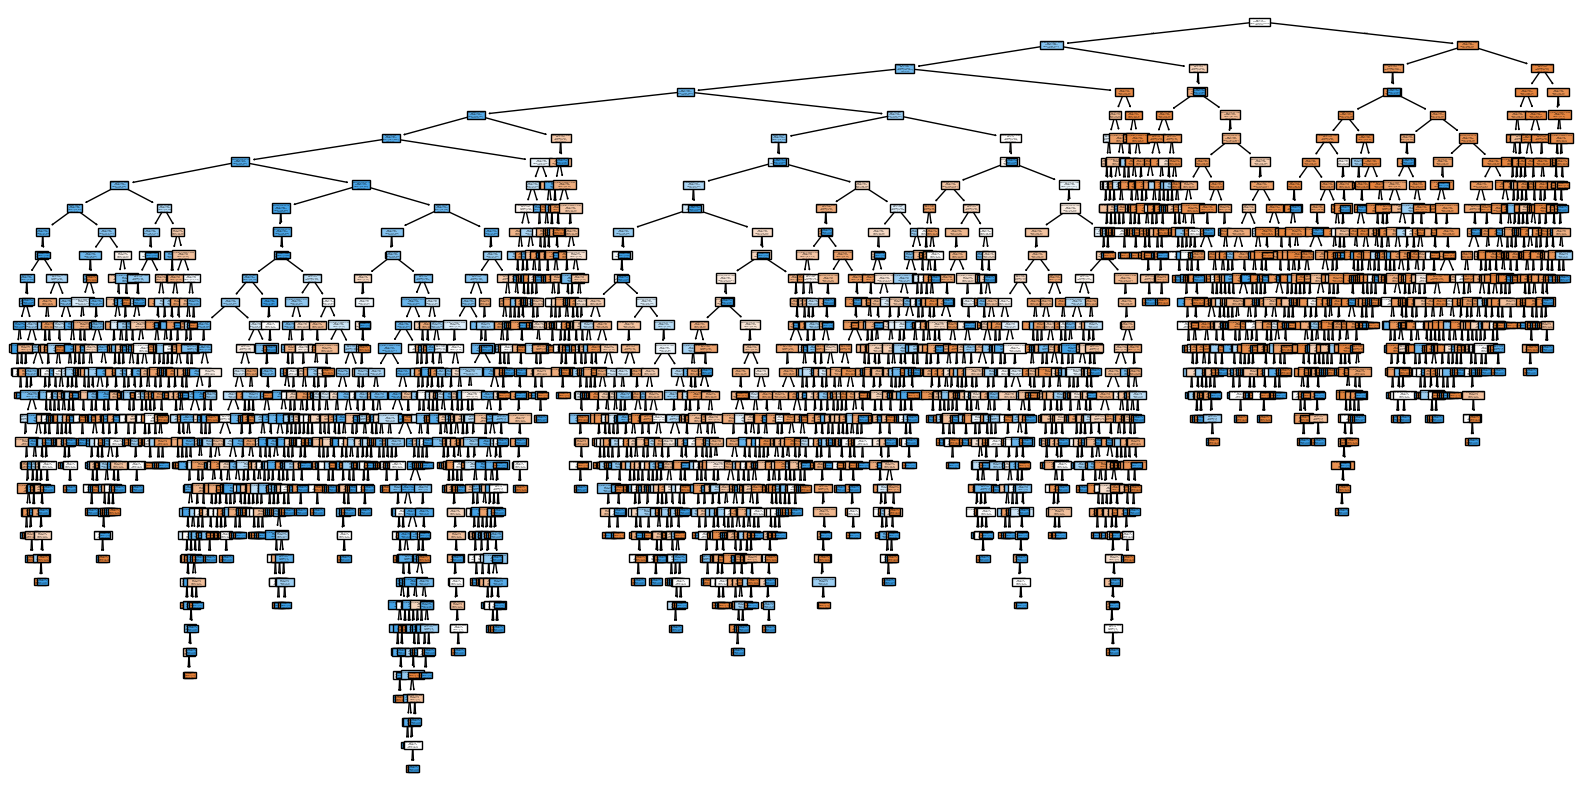

In [124]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
feature_names = df.drop(columns=["Target"]).columns
tree.plot_tree(dt_classifier, filled=True, feature_names=feature_names, class_names=["Stayed", "Left"])
plt.show()


#### plain vanilla decision tree classifier with default parameters and hyperparameters gives Accuracy: 0.92128and f1-score of 0.92
#### from the visualization of tree diagram we can see that it is an overfit model

In [125]:
# Initialize the decision tree classifier
dtc1 = DecisionTreeClassifier(random_state=42,
                              max_depth=10, 
                              min_samples_split=8, 
                              min_samples_leaf=4, 
                              max_features=None, 
                              max_leaf_nodes=None, 
                              min_impurity_decrease=0.0, 
                              class_weight=None, 
                              ccp_alpha=0.0, 
                              monotonic_cst=None)

In [126]:
# Train the decision tree classifier on the training data
dtc1.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=8,
                       random_state=42)

In [127]:
# Predict on the validation set
y_val_pred = dtc1.predict(X_val_scaled)

# Predict on the test set
y_test_pred = dtc1.predict(X_test_scaled)

# Evaluate performance on the validation set
print("Validation Set Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate performance on the test set
print("Test Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Validation Set Performance:
Accuracy: 0.9018299656881433
Confusion Matrix:
 [[2403  250]
 [ 265 2328]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      2653
           1       0.90      0.90      0.90      2593

    accuracy                           0.90      5246
   macro avg       0.90      0.90      0.90      5246
weighted avg       0.90      0.90      0.90      5246

Test Set Performance:
Accuracy: 0.9108061749571184
Confusion Matrix:
 [[2370  253]
 [ 215 2409]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      2623
           1       0.90      0.92      0.91      2624

    accuracy                           0.91      5247
   macro avg       0.91      0.91      0.91      5247
weighted avg       0.91      0.91      0.91      5247



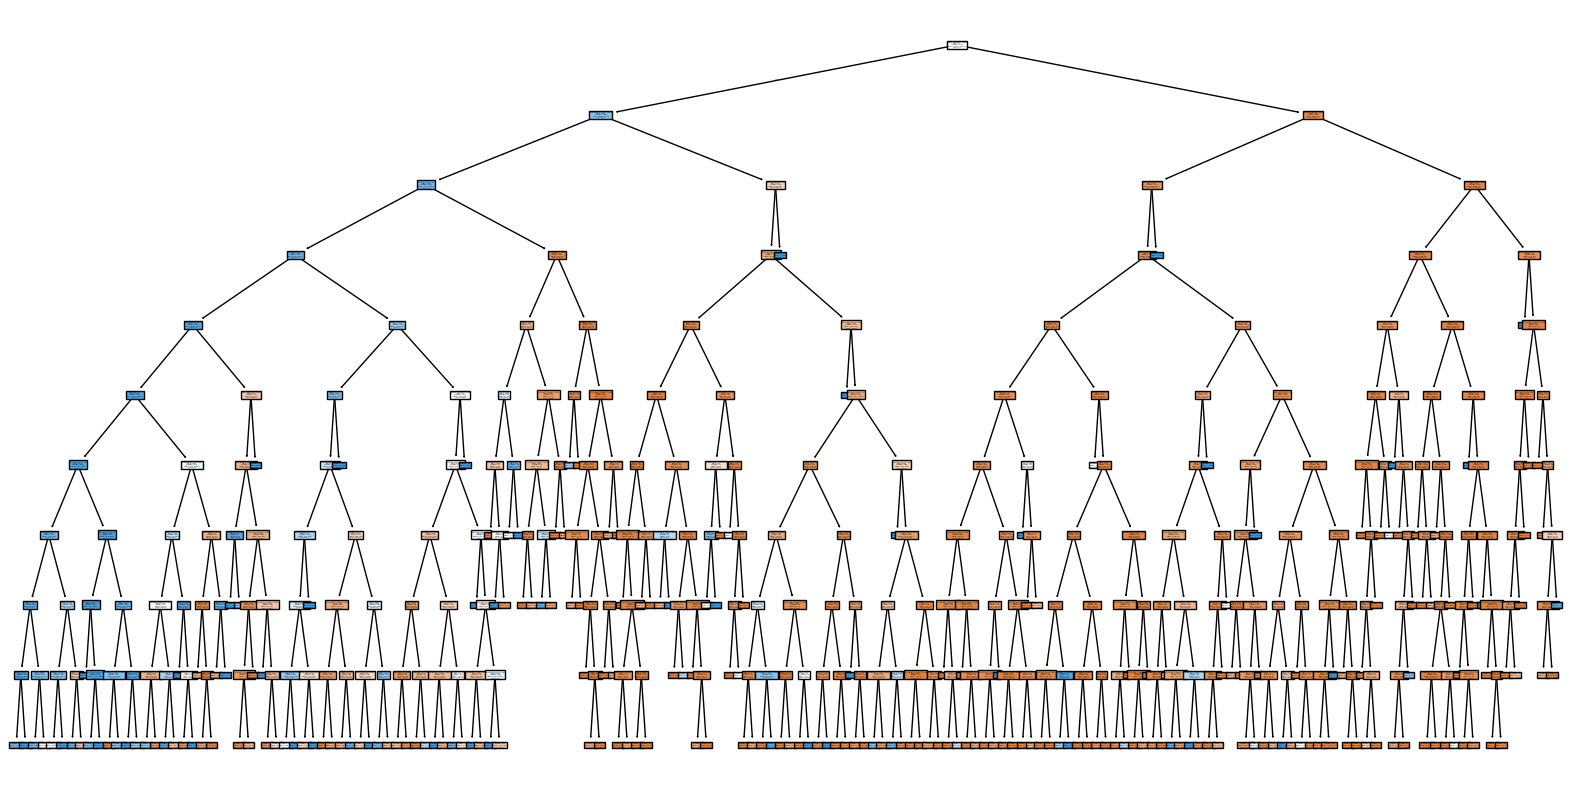

In [128]:
from sklearn import tree
import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))
tree.plot_tree(dtc1, filled=True, feature_names=feature_names, class_names=["Stayed", "Left"])
plt.show()

In [129]:
# Initialize the decision tree classifier
dtc2 = DecisionTreeClassifier(random_state=42,
                              max_depth=8, 
                              min_samples_split=4, 
                              min_samples_leaf=2, 
                              max_features=None, 
                              max_leaf_nodes=None, 
                              min_impurity_decrease=0, 
                              class_weight=None, 
                              ccp_alpha=0.0, 
                              monotonic_cst=None)

In [130]:
# Train the decision tree classifier on the training data
dtc2.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0, min_samples_leaf=2,
                       min_samples_split=4, random_state=42)

In [131]:
# Predict on the validation set
y_val_pred = dtc2.predict(X_val_scaled)

# Predict on the test set
y_test_pred = dtc2.predict(X_test_scaled)

# Evaluate performance on the validation set
print("Validation Set Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate performance on the test set
print("Test Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Set Performance:
Accuracy: 0.8898208158597026
Confusion Matrix:
 [[2321  332]
 [ 246 2347]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      2653
           1       0.88      0.91      0.89      2593

    accuracy                           0.89      5246
   macro avg       0.89      0.89      0.89      5246
weighted avg       0.89      0.89      0.89      5246

Test Set Performance:
Accuracy: 0.8944158566800077
Confusion Matrix:
 [[2278  345]
 [ 209 2415]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89      2623
           1       0.88      0.92      0.90      2624

    accuracy                           0.89      5247
   macro avg       0.90      0.89      0.89      5247
weighted avg       0.90      0.89      0.89      5247



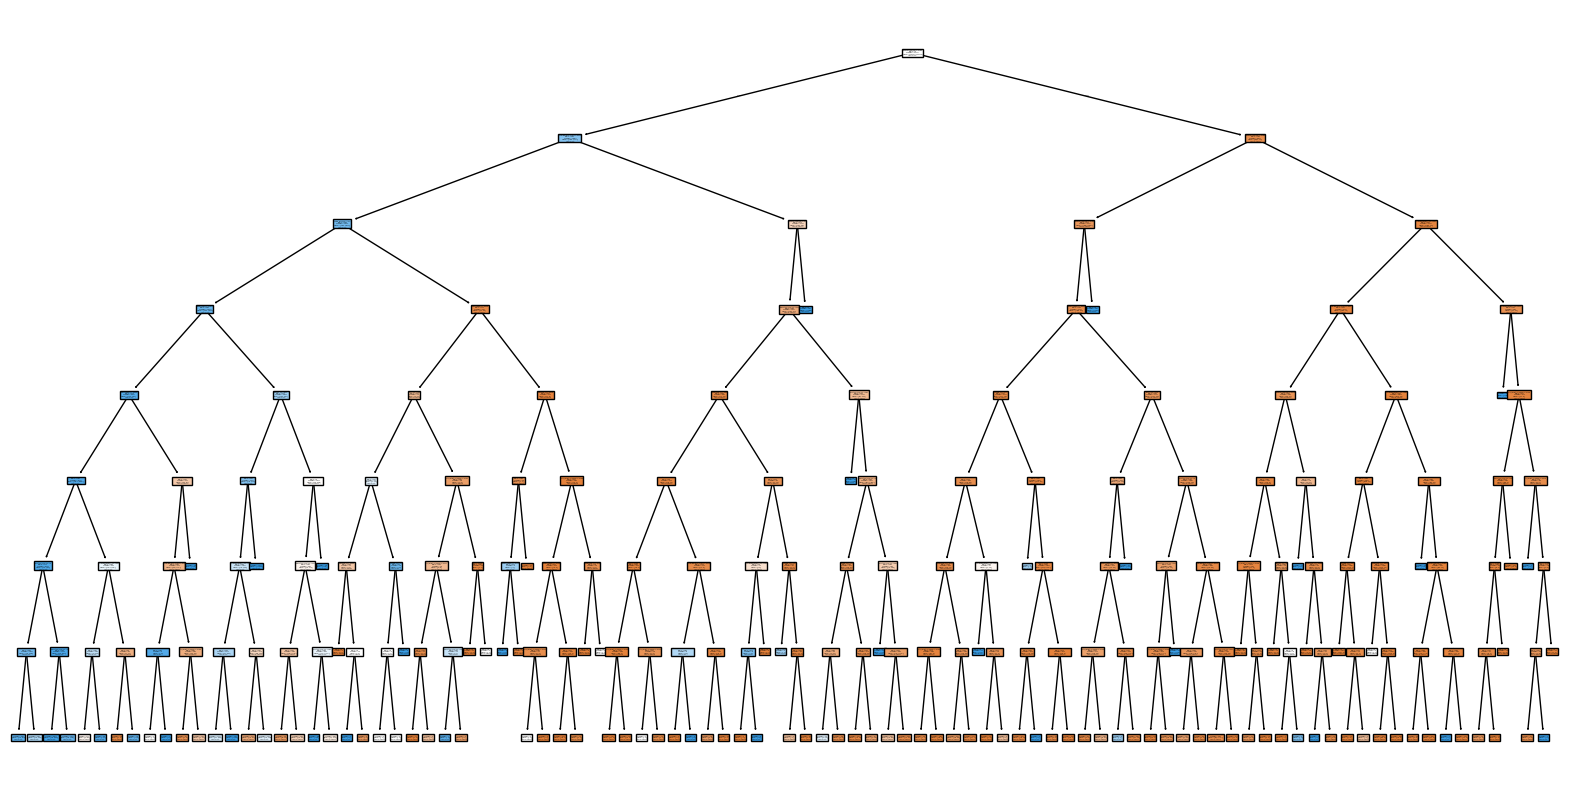

In [132]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(dtc2, filled=True, feature_names=feature_names, class_names=["Stayed", "Left"])
plt.show()

In [133]:
# Initialize the decision tree classifier
dtc3 = DecisionTreeClassifier(random_state=42,
                              max_depth=6, 
                              min_samples_split=4, 
                              min_samples_leaf=2, 
                              max_features=None, 
                              max_leaf_nodes=None, 
                              min_impurity_decrease=0, 
                              class_weight=None, 
                              ccp_alpha=0.0, 
                              monotonic_cst=None)

In [134]:
# Train the decision tree classifier on the training data
dtc3.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0, min_samples_leaf=2,
                       min_samples_split=4, random_state=42)

In [135]:
# Predict on the validation set
y_val_pred = dtc3.predict(X_val_scaled)

# Predict on the test set
y_test_pred = dtc3.predict(X_test_scaled)

# Evaluate performance on the validation set
print("Validation Set Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate performance on the test set
print("Test Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Set Performance:
Accuracy: 0.8715211589782692
Confusion Matrix:
 [[2255  398]
 [ 276 2317]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      2653
           1       0.85      0.89      0.87      2593

    accuracy                           0.87      5246
   macro avg       0.87      0.87      0.87      5246
weighted avg       0.87      0.87      0.87      5246

Test Set Performance:
Accuracy: 0.8726891557080236
Confusion Matrix:
 [[2212  411]
 [ 257 2367]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      2623
           1       0.85      0.90      0.88      2624

    accuracy                           0.87      5247
   macro avg       0.87      0.87      0.87      5247
weighted avg       0.87      0.87      0.87      5247



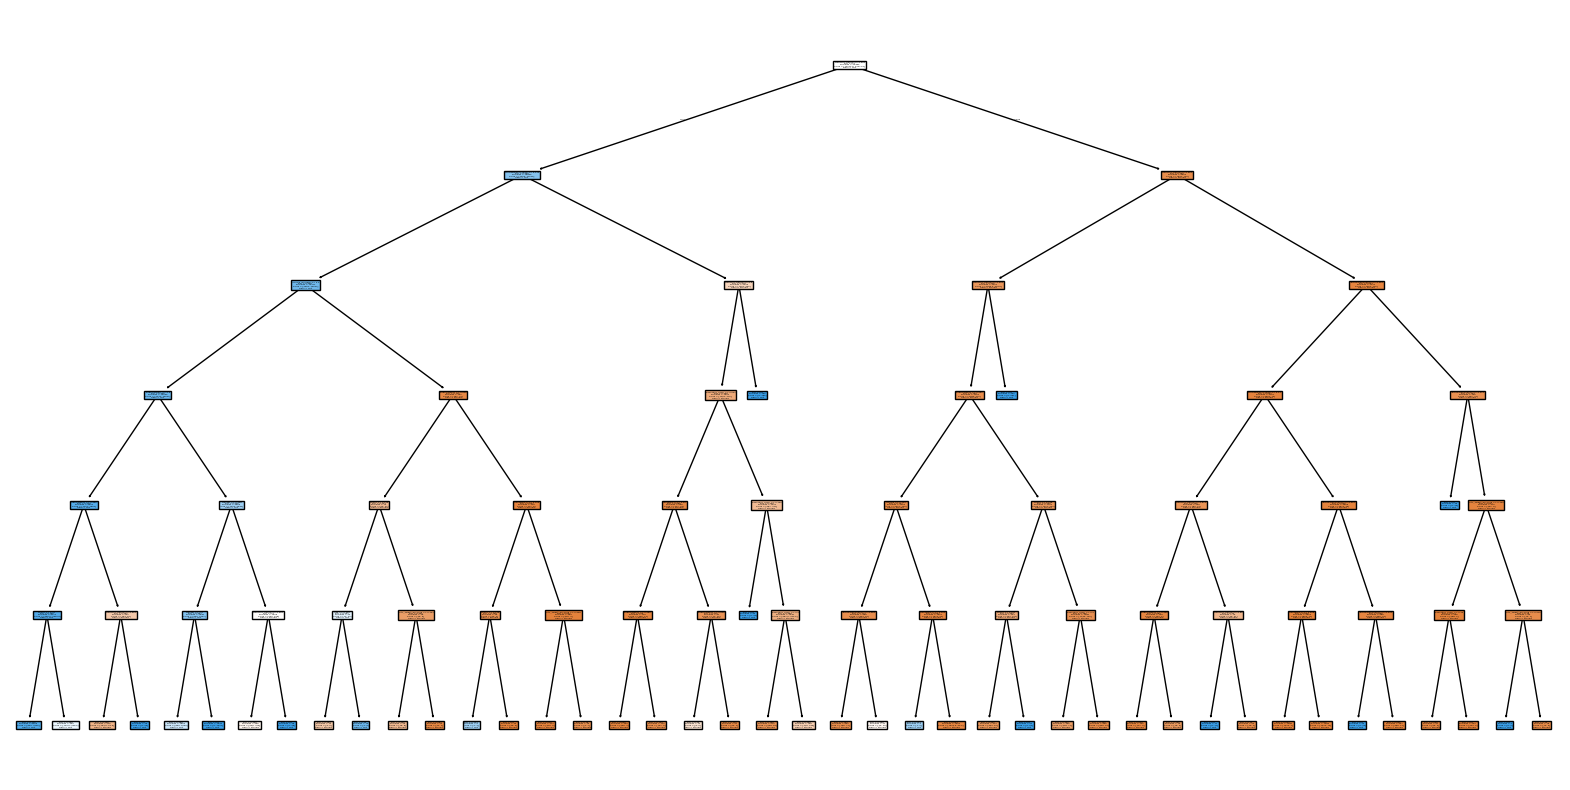

In [136]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(dtc3, filled=True, feature_names=feature_names, class_names=["Stayed", "Left"])
plt.show()

In [137]:
# Initialize the decision tree classifier
dtc4 = DecisionTreeClassifier(random_state=42,
                              max_depth=None, 
                              min_samples_split=8, 
                              min_samples_leaf=4, 
                              max_features=None, 
                              max_leaf_nodes=None, 
                              min_impurity_decrease=0.05, 
                              class_weight=None, 
                              ccp_alpha=0.0, 
                              monotonic_cst=None)

In [138]:
# Train the decision tree classifier on the training data
dtc4.fit(X_train_scaled, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.05, min_samples_leaf=4,
                       min_samples_split=8, random_state=42)

In [139]:
# Predict on the validation set
y_val_pred = dtc4.predict(X_val_scaled)

# Predict on the test set
y_test_pred = dtc4.predict(X_test_scaled)

# Evaluate performance on the validation set
print("Validation Set Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate performance on the test set
print("Test Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Set Performance:
Accuracy: 0.7889820815859703
Confusion Matrix:
 [[1699  954]
 [ 153 2440]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.64      0.75      2653
           1       0.72      0.94      0.82      2593

    accuracy                           0.79      5246
   macro avg       0.82      0.79      0.78      5246
weighted avg       0.82      0.79      0.78      5246

Test Set Performance:
Accuracy: 0.7953116066323613
Confusion Matrix:
 [[1698  925]
 [ 149 2475]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.65      0.76      2623
           1       0.73      0.94      0.82      2624

    accuracy                           0.80      5247
   macro avg       0.82      0.80      0.79      5247
weighted avg       0.82      0.80      0.79      5247



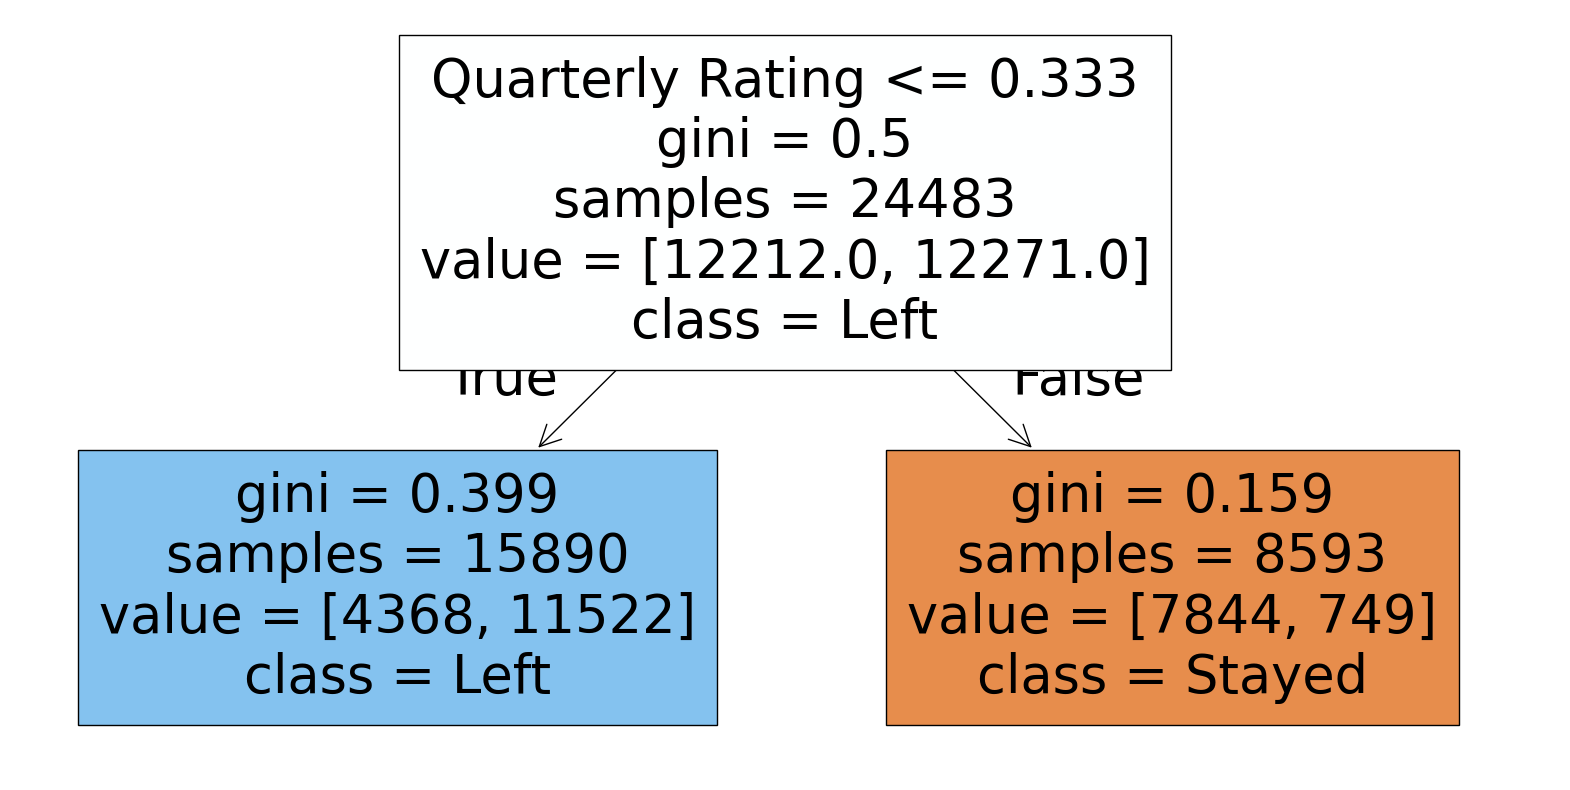

In [140]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(dtc4, filled=True, feature_names=feature_names, class_names=["Stayed", "Left"])
plt.show()

In [141]:
# Initialize the decision tree classifier
dtc5 = DecisionTreeClassifier(random_state=42,
                              max_depth=None, 
                              min_samples_split=8, 
                              min_samples_leaf=4, 
                              max_features=None, 
                              max_leaf_nodes=None, 
                              min_impurity_decrease=0.02, 
                              class_weight=None, 
                              ccp_alpha=0.0, 
                              monotonic_cst=None)

In [142]:
# Train the decision tree classifier on the training data
dtc5.fit(X_train_scaled, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.02, min_samples_leaf=4,
                       min_samples_split=8, random_state=42)

In [143]:
# Predict on the validation set
y_val_pred = dtc5.predict(X_val_scaled)

# Predict on the test set
y_test_pred = dtc5.predict(X_test_scaled)

# Evaluate performance on the validation set
print("Validation Set Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate performance on the test set
print("Test Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Set Performance:
Accuracy: 0.8272969881814716
Confusion Matrix:
 [[2109  544]
 [ 362 2231]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      2653
           1       0.80      0.86      0.83      2593

    accuracy                           0.83      5246
   macro avg       0.83      0.83      0.83      5246
weighted avg       0.83      0.83      0.83      5246

Test Set Performance:
Accuracy: 0.8328568705927196
Confusion Matrix:
 [[2091  532]
 [ 345 2279]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      2623
           1       0.81      0.87      0.84      2624

    accuracy                           0.83      5247
   macro avg       0.83      0.83      0.83      5247
weighted avg       0.83      0.83      0.83      5247



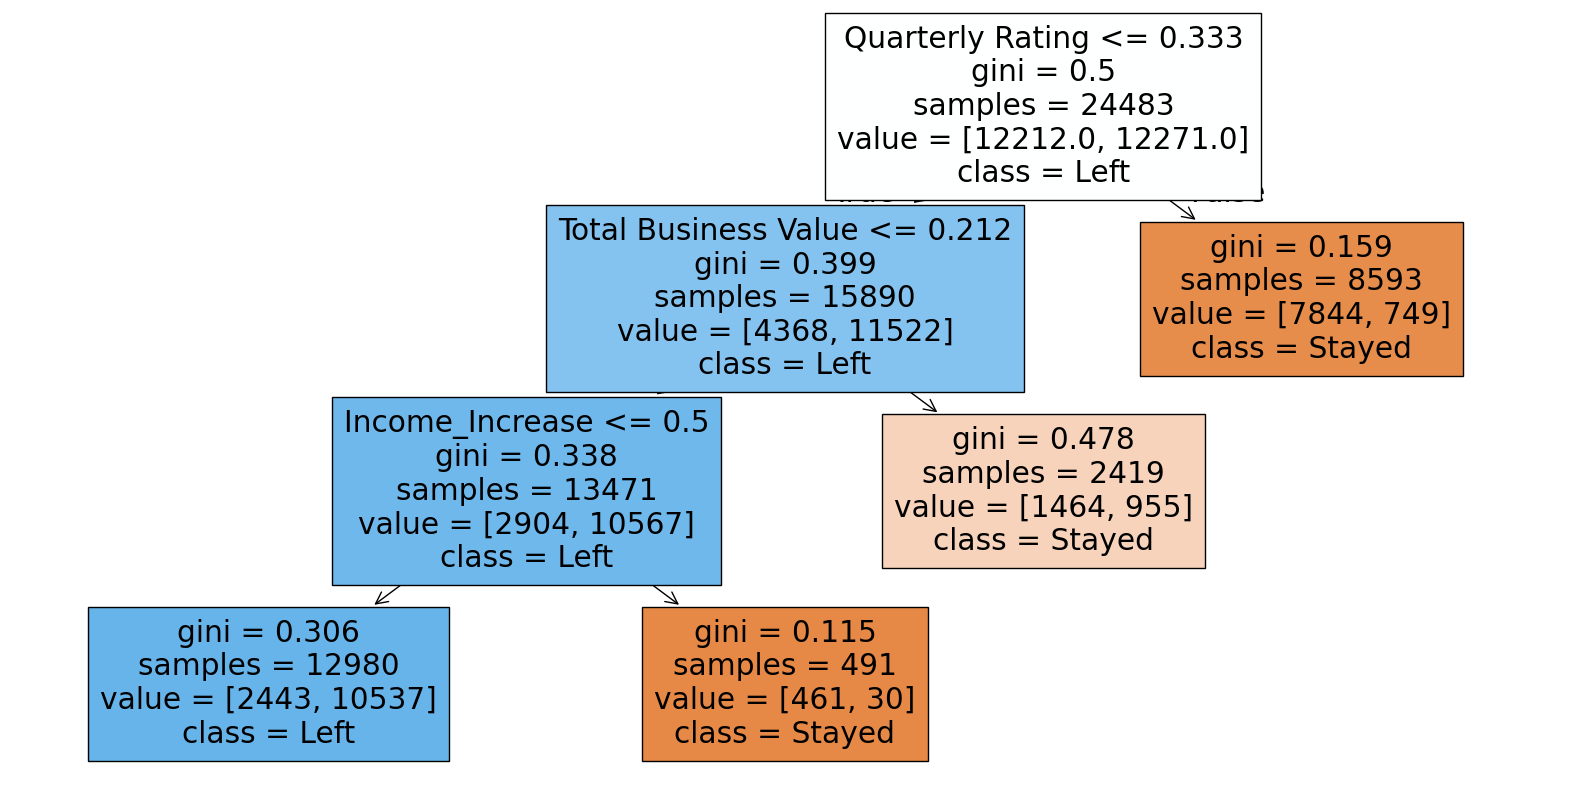

In [144]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(dtc5, filled=True, feature_names=feature_names, class_names=["Stayed", "Left"])
plt.show()

In [145]:
# Initialize the decision tree classifier
dtc6 = DecisionTreeClassifier(random_state=42,
                              max_depth=None, 
                              min_samples_split=8, 
                              min_samples_leaf=4, 
                              max_features=None, 
                              max_leaf_nodes=None, 
                              min_impurity_decrease=0.005, 
                              class_weight=None, 
                              ccp_alpha=0.0, 
                              monotonic_cst=None)

In [146]:
# Train the decision tree classifier on the training data
dtc6.fit(X_train_scaled, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.005, min_samples_leaf=4,
                       min_samples_split=8, random_state=42)

In [147]:
# Predict on the validation set
y_val_pred = dtc6.predict(X_val_scaled)

# Predict on the test set
y_test_pred = dtc6.predict(X_test_scaled)

# Evaluate performance on the validation set
print("Validation Set Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate performance on the test set
print("Test Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Set Performance:
Accuracy: 0.848455966450629
Confusion Matrix:
 [[2142  511]
 [ 284 2309]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      2653
           1       0.82      0.89      0.85      2593

    accuracy                           0.85      5246
   macro avg       0.85      0.85      0.85      5246
weighted avg       0.85      0.85      0.85      5246

Test Set Performance:
Accuracy: 0.8517247951210215
Confusion Matrix:
 [[2116  507]
 [ 271 2353]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.84      2623
           1       0.82      0.90      0.86      2624

    accuracy                           0.85      5247
   macro avg       0.85      0.85      0.85      5247
weighted avg       0.85      0.85      0.85      5247



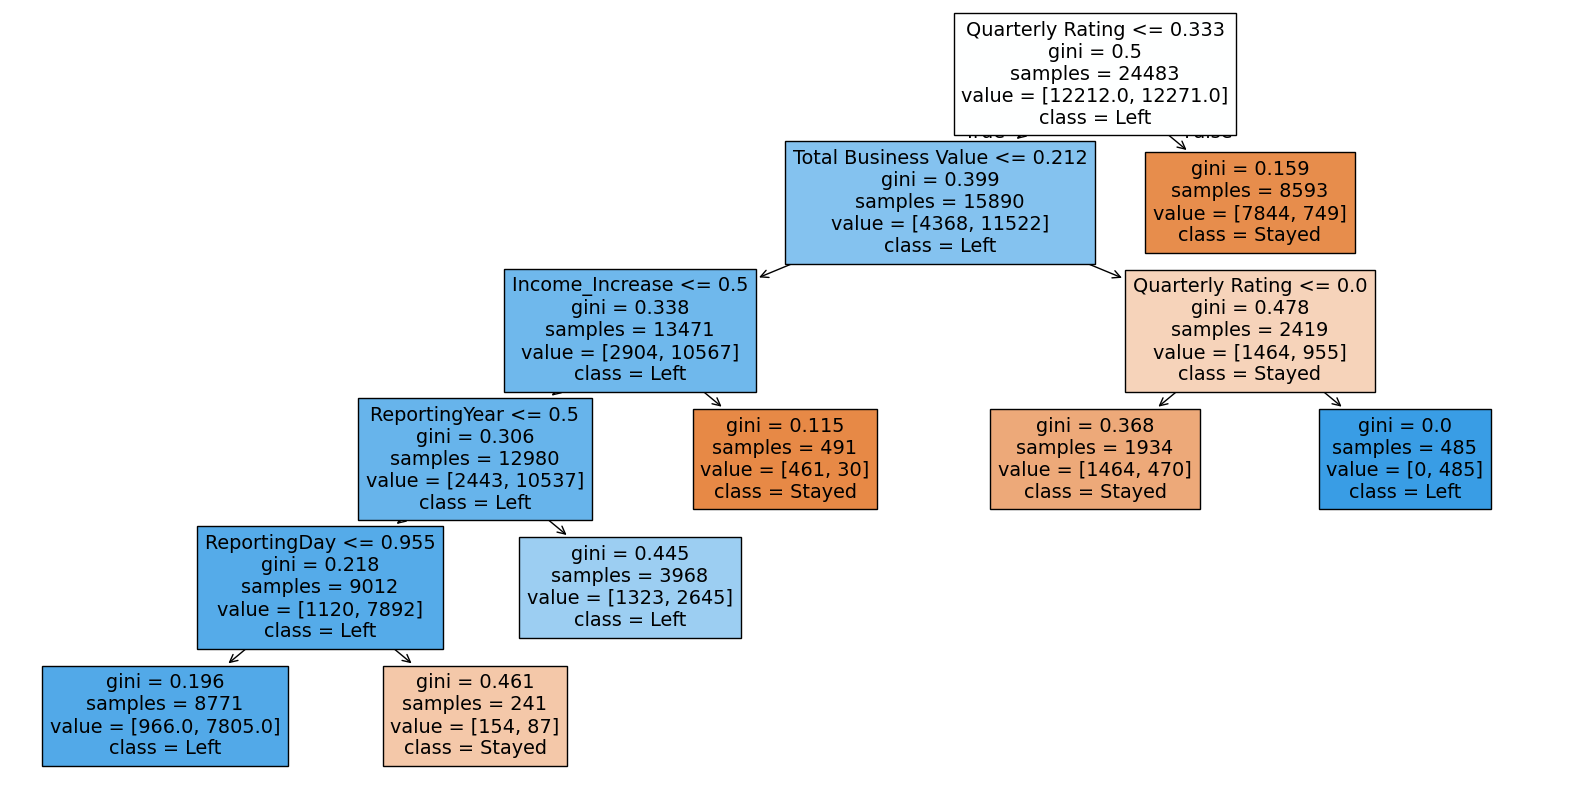

In [148]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(dtc6, filled=True, feature_names=feature_names, class_names=["Stayed", "Left"])
plt.show()

In [149]:
# Initialize the decision tree classifier
dtc7 = DecisionTreeClassifier(random_state=42,
                              max_depth=None, 
                              min_samples_split=8, 
                              min_samples_leaf=4, 
                              max_features=None, 
                              max_leaf_nodes=None, 
                              min_impurity_decrease=0.0005, 
                              class_weight=None, 
                              ccp_alpha=0.0, 
                              monotonic_cst=None)

In [150]:
# Train the decision tree classifier on the training data
dtc7.fit(X_train_scaled, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0005, min_samples_leaf=4,
                       min_samples_split=8, random_state=42)

In [151]:
# Predict on the validation set
y_val_pred = dtc7.predict(X_val_scaled)

# Predict on the test set
y_test_pred = dtc7.predict(X_test_scaled)

# Evaluate performance on the validation set
print("Validation Set Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate performance on the test set
print("Test Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Set Performance:
Accuracy: 0.8867708730461303
Confusion Matrix:
 [[2391  262]
 [ 332 2261]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      2653
           1       0.90      0.87      0.88      2593

    accuracy                           0.89      5246
   macro avg       0.89      0.89      0.89      5246
weighted avg       0.89      0.89      0.89      5246

Test Set Performance:
Accuracy: 0.8871736230226797
Confusion Matrix:
 [[2343  280]
 [ 312 2312]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      2623
           1       0.89      0.88      0.89      2624

    accuracy                           0.89      5247
   macro avg       0.89      0.89      0.89      5247
weighted avg       0.89      0.89      0.89      5247



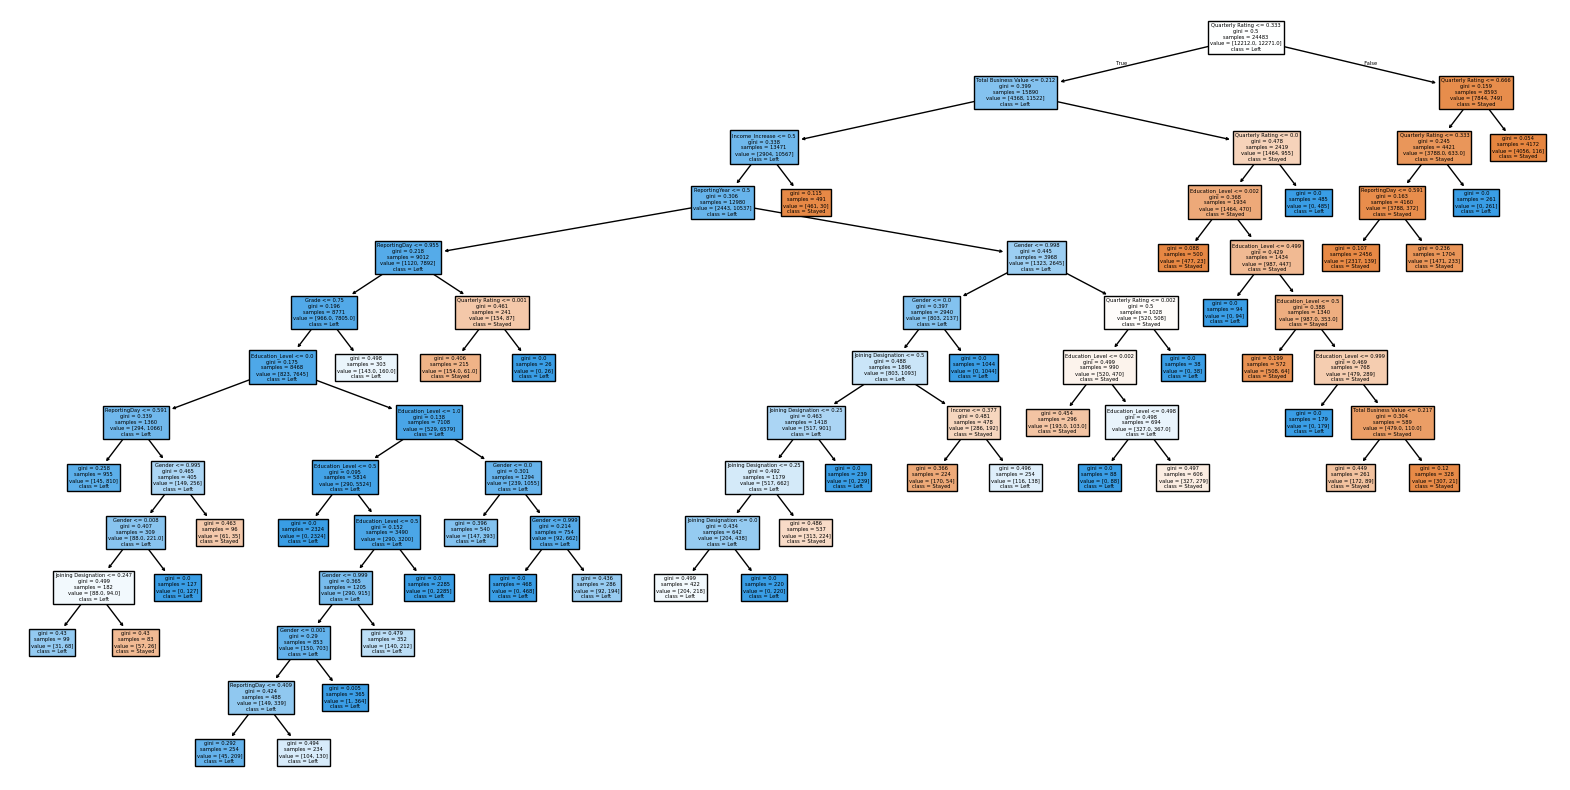

In [152]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(dtc7, filled=True, feature_names=feature_names, class_names=["Stayed", "Left"])
plt.show()

In [156]:
features = df.drop(columns=["Target"]).columns

# Get feature importances from the decision tree
importances = dtc7.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

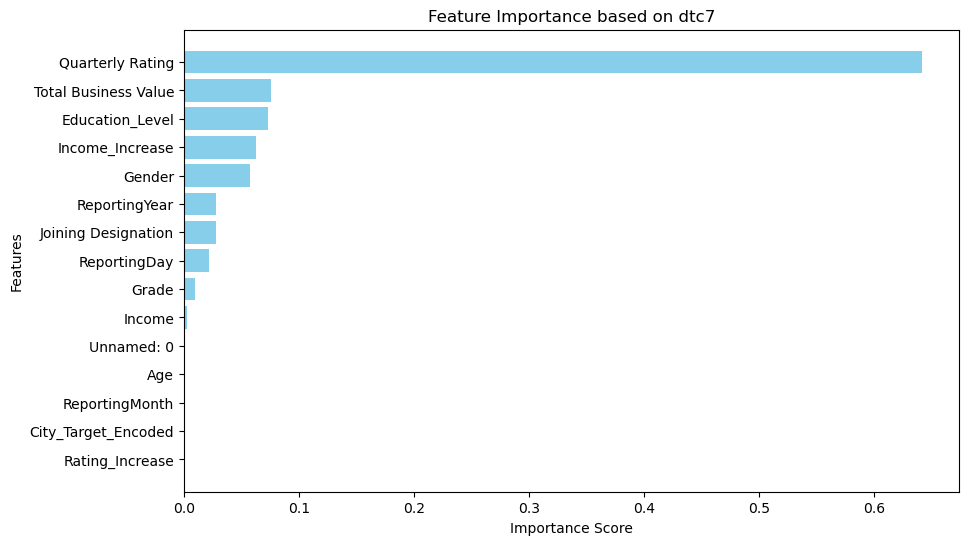

In [157]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance based on dtc7')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

#### "min_impurity_decrease" looks like a better hyperparameter compared to others (like max_depth, min_samples_split, min_samples_leaf etc)
#### dtc7 looks to be a good choice with accuracy=0.887 and f1-score=0.88 and also explainability will be good

In [675]:
!pip install pydotplus

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=cccd2582f82d559bb77dbfc58fbb2e7752a8032ac847558090ab31faf43318eb
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\bd\ce\e8\ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


In [678]:
!pip install graphviz pydotplus

In [680]:
!choco install graphviz

'choco' is not recognized as an internal or external command,
operable program or batch file.


In [681]:
!dot -version

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
######

In [684]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [685]:
# Export the decision tree to a DOT file
dot_data = export_graphviz(
    dtc7, 
    out_file=None,  # Output as a string
    filled=True, 
    rounded=True,
    special_characters=True,
    feature_names=df.drop(columns=["Target"]).columns, 
    class_names=["Class 0", "Class 1"]  # Replace with actual class names
)

# Use pydotplus to create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Save the graph as a PDF
graph.write_pdf("decision_tree_dtc7.pdf")

True

In [ ]:
# pdf exported file of this decision tree can help in defining the decision rules... This pdf will be shared in teh same folder

# Bagging (Random Forest)

In [614]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)


In [615]:
# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [616]:
# Predict on the validation set
y_val_pred = rf_classifier.predict(X_val_scaled)

In [617]:
# Predict on the test set
y_test_pred = rf_classifier.predict(X_test_scaled)

In [618]:
# Validation set performance
print("Validation Set Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Set Performance:
Accuracy: 0.9365230651925276
Confusion Matrix:
 [[2546  107]
 [ 226 2367]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2653
           1       0.96      0.91      0.93      2593

    accuracy                           0.94      5246
   macro avg       0.94      0.94      0.94      5246
weighted avg       0.94      0.94      0.94      5246



In [619]:
# Test set performance
print("Test Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Test Set Performance:
Accuracy: 0.942062130741376
Confusion Matrix:
 [[2513  110]
 [ 194 2430]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      2623
           1       0.96      0.93      0.94      2624

    accuracy                           0.94      5247
   macro avg       0.94      0.94      0.94      5247
weighted avg       0.94      0.94      0.94      5247



#### plain vanilla Random Forest classifier: accuracy: 0.942062130741376; f1-score:0.94 (Test set based); scores are already good and even after hyperparameter tuning and using xgboost , lightGBM and stacking did not result in significant improvement in the model performance.

In [620]:
from sklearn.model_selection import GridSearchCV

In [621]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [622]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit Grid Search on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\s

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [623]:
# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters found by Grid Search:", best_params)

# Evaluate on the validation set
y_val_pred = grid_search.predict(X_val_scaled)
print("Validation Set Performance After Grid Search:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Best Parameters found by Grid Search: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Validation Set Performance After Grid Search:
Accuracy: 0.9363324437666793
Confusion Matrix:
 [[2545  108]
 [ 226 2367]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2653
           1       0.96      0.91      0.93      2593

    accuracy                           0.94      5246
   macro avg       0.94      0.94      0.94      5246
weighted avg       0.94      0.94      0.94      5246



#### Random Forest classifier: gridsearchCV accuracy: 0.9363324437666793; f1-score:0.94 (slightly better than randomisedsearchCV)

### Hyper parameter tuning using randomizedsearchCV

In [624]:
from sklearn.model_selection import RandomizedSearchCV

In [625]:
import time

In [626]:
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

In [627]:
# Start the timer
start_time = time.time()

In [628]:
# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit Random Search on the training data
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
165 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sk

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250])},
                   random_state=42, scoring='accuracy', verbose=2)

In [629]:
# Stop the timer
end_time = time.time()

In [630]:
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Random Search completed in: {elapsed_time:.2f} seconds")

Random Search completed in: 919.48 seconds


In [631]:
# Get the best parameters found by RandomizedSearchCV
best_params_random = random_search.best_params_
print("Best Parameters found by Random Search:", best_params_random)

# Evaluate on the validation set
y_val_pred_random = random_search.predict(X_val_scaled)
print("Validation Set Performance After Random Search:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_random))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_random))
print("Classification Report:\n", classification_report(y_val, y_val_pred_random))

Best Parameters found by Random Search: {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50}
Validation Set Performance After Random Search:
Accuracy: 0.9361418223408311
Confusion Matrix:
 [[2543  110]
 [ 225 2368]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2653
           1       0.96      0.91      0.93      2593

    accuracy                           0.94      5246
   macro avg       0.94      0.94      0.94      5246
weighted avg       0.94      0.94      0.94      5246



#### Random Forest classifier: RandomisedsearchCV Accuracy: 0.9361418223408311; f1-score: 0.94

# Boosting using xgboost

In [632]:
import xgboost as xgb

In [633]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

In [634]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [635]:
# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Start the timer
start_time = time.time()

# Fit Grid Search on the training data
grid_search_xgb.fit(X_train_scaled, y_train)

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time_grid = end_time - start_time
print(f"GridSearchCV completed in: {elapsed_time_grid:.2f} seconds")

# Get the best parameters and evaluate
best_params_grid = grid_search_xgb.best_params_
print("Best Parameters found by Grid Search:", best_params_grid)

y_val_pred_grid = grid_search_xgb.predict(X_val_scaled)
print("Validation Set Performance After Grid Search:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_grid))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_grid))
print("Classification Report:\n", classification_report(y_val, y_val_pred_grid))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


C:\Users\Dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:00:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV completed in: 1463.44 seconds
Best Parameters found by Grid Search: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Validation Set Performance After Grid Search:
Accuracy: 0.9441479222264583
Confusion Matrix:
 [[2603   50]
 [ 243 2350]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      2653
           1       0.98      0.91      0.94      2593

    accuracy                           0.94      5246
   macro avg       0.95      0.94      0.94      5246
weighted avg       0.95      0.94      0.94      5246



In [636]:
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=10)],
    'max_depth': [int(x) for x in np.linspace(3, 10, num=4)],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

In [637]:
# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Start the timer
start_time = time.time()

# Fit Randomized Search on the training data
random_search_xgb.fit(X_train_scaled, y_train)

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time_random = end_time - start_time
print(f"RandomizedSearchCV completed in: {elapsed_time_random:.2f} seconds")

# Get the best parameters and evaluate
best_params_random = random_search_xgb.best_params_
print("Best Parameters found by Random Search:", best_params_random)

y_val_pred_random = random_search_xgb.predict(X_val_scaled)
print("Validation Set Performance After Random Search:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_random))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_random))
print("Classification Report:\n", classification_report(y_val, y_val_pred_random))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:03:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV completed in: 181.46 seconds
Best Parameters found by Random Search: {'subsample': 1.0, 'n_estimators': 116, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.6}
Validation Set Performance After Random Search:
Accuracy: 0.9435760579489134
Confusion Matrix:
 [[2595   58]
 [ 238 2355]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      2653
           1       0.98      0.91      0.94      2593

    accuracy                           0.94      5246
   macro avg       0.95      0.94      0.94      5246
weighted avg       0.95      0.94      0.94      5246



In [638]:
# Evaluate on the test set for final comparison

# Vanilla XGBoost
xgb_classifier.fit(X_train_scaled, y_train)
y_test_pred_vanilla = xgb_classifier.predict(X_test_scaled)
print("Test Set Performance for Vanilla XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_vanilla))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_vanilla))
print("Classification Report:\n", classification_report(y_test, y_test_pred_vanilla))

# Best model from GridSearchCV
y_test_pred_grid = grid_search_xgb.predict(X_test_scaled)
print("\nTest Set Performance for GridSearchCV XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_grid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_grid))
print("Classification Report:\n", classification_report(y_test, y_test_pred_grid))

# Best model from RandomizedSearchCV
y_test_pred_random = random_search_xgb.predict(X_test_scaled)
print("\nTest Set Performance for RandomizedSearchCV XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_random))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_random))
print("Classification Report:\n", classification_report(y_test, y_test_pred_random))

# Print timing information
print(f"\nTiming Summary:")
print(f"GridSearchCV Time: {elapsed_time_grid:.2f} seconds")
print(f"RandomizedSearchCV Time: {elapsed_time_random:.2f} seconds")

C:\Users\Dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:03:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Set Performance for Vanilla XGBoost:
Accuracy: 0.9483514389174766
Confusion Matrix:
 [[2544   79]
 [ 192 2432]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      2623
           1       0.97      0.93      0.95      2624

    accuracy                           0.95      5247
   macro avg       0.95      0.95      0.95      5247
weighted avg       0.95      0.95      0.95      5247


Test Set Performance for GridSearchCV XGBoost:
Accuracy: 0.9483514389174766
Confusion Matrix:
 [[2559   64]
 [ 207 2417]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      2623
           1       0.97      0.92      0.95      2624

    accuracy                           0.95      5247
   macro avg       0.95      0.95      0.95      5247
weighted avg       0.95      0.95      0.95      5247


Test Set Performance for RandomizedSearchCV XGBoost:
Accu

####  Test Set Performance for GridSearchCV XGBoost: Accuracy: 0.9483514389174766; f1-score: 0.95 slightly better than RandomizedSearchCV XGBoost Test Set Performance for Vanilla XGBoost: Accuracy: 0.948351438917476; f1-score: 0.95

#### Vanilla xgboost is already optimised to the extent such that gridsearchCV and randomisedsearchCV are not showing any better performance indicators6

## light boost (lightGBM)

In [639]:
import lightgbm as lgb

In [640]:
# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

In [641]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10, -1],  # -1 indicates no limit on depth
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'num_leaves': [31, 50, 100],
    'min_child_samples': [20, 50, 100]
}

In [642]:
# Initialize GridSearchCV
grid_search_lgb = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Start the timer
start_time = time.time()

# Fit Grid Search on the training data
grid_search_lgb.fit(X_train_scaled, y_train)

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time_grid = end_time - start_time
print(f"GridSearchCV completed in: {elapsed_time_grid:.2f} seconds")

# Get the best parameters and evaluate
best_params_grid = grid_search_lgb.best_params_
print("Best Parameters found by Grid Search:", best_params_grid)

y_val_pred_grid = grid_search_lgb.predict(X_val_scaled)
print("Validation Set Performance After Grid Search:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_grid))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_grid))
print("Classification Report:\n", classification_report(y_val, y_val_pred_grid))


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
[LightGBM] [Info] Number of positive: 12271, number of negative: 12212
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2568
[LightGBM] [Info] Number of data points in the train set: 24483, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501205 -> initscore=0.004820
[LightGBM] [Info] Start training from score 0.004820
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [643]:
param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': [-1, 3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'num_leaves': np.arange(31, 101, 10),
    'min_child_samples': np.arange(20, 101, 20)
}


In [644]:
# Initialize RandomizedSearchCV
random_search_lgb = RandomizedSearchCV(estimator=lgb_classifier, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Start the timer
start_time = time.time()

# Fit Randomized Search on the training data
random_search_lgb.fit(X_train_scaled, y_train)

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time_random = end_time - start_time
print(f"RandomizedSearchCV completed in: {elapsed_time_random:.2f} seconds")

# Get the best parameters and evaluate
best_params_random = random_search_lgb.best_params_
print("Best Parameters found by Random Search:", best_params_random)

y_val_pred_random = random_search_lgb.predict(X_val_scaled)
print("Validation Set Performance After Random Search:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_random))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_random))
print("Classification Report:\n", classification_report(y_val, y_val_pred_random))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 12271, number of negative: 12212
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2568
[LightGBM] [Info] Number of data points in the train set: 24483, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501205 -> initscore=0.004820
[LightGBM] [Info] Start training from score 0.004820
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [645]:
# Evaluate on the test set for final comparison

# Vanilla LightGBM
lgb_classifier.fit(X_train_scaled, y_train)
y_test_pred_vanilla = lgb_classifier.predict(X_test_scaled)
print("Test Set Performance for Vanilla LightGBM:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_vanilla))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_vanilla))
print("Classification Report:\n", classification_report(y_test, y_test_pred_vanilla))

# Best model from GridSearchCV
y_test_pred_grid = grid_search_lgb.predict(X_test_scaled)
print("\nTest Set Performance for GridSearchCV LightGBM:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_grid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_grid))
print("Classification Report:\n", classification_report(y_test, y_test_pred_grid))

# Best model from RandomizedSearchCV
y_test_pred_random = random_search_lgb.predict(X_test_scaled)
print("\nTest Set Performance for RandomizedSearchCV LightGBM:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_random))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_random))
print("Classification Report:\n", classification_report(y_test, y_test_pred_random))

# Print timing information
print(f"\nTiming Summary:")
print(f"GridSearchCV Time: {elapsed_time_grid:.2f} seconds")
print(f"RandomizedSearchCV Time: {elapsed_time_random:.2f} seconds")


[LightGBM] [Info] Number of positive: 12271, number of negative: 12212
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2568
[LightGBM] [Info] Number of data points in the train set: 24483, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501205 -> initscore=0.004820
[LightGBM] [Info] Start training from score 0.004820
Test Set Performance for Vanilla LightGBM:
Accuracy: 0.9498761196874405
Confusion Matrix:
 [[2559   64]
 [ 199 2425]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      2623
           1       0.97      0.92      0.95      2624

    accuracy                           0.95      5247
   macro avg       0.95      0.95      0.95      5247
weighted avg       0.95      0

#### Test Set Performance for GridSearchCV LightGBM: Accuracy: 0.9510196302649133 f1 score: 0.95 slightly better than RandomizedSearchCV LightGBM
#### Test Set Performance for RandomizedSearchCV LightGBM: Accuracy: 0.0.9500667047836859 f1 score: 0.95 slightly better than RandomizedSearchCV LightGBM

# Stacking

In [646]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [647]:
# Define the base models for stacking
base_models = [
    ('rf', rf_classifier),  # Random Forest
    ('xgb', grid_search_xgb.best_estimator_),  # XGBoost with best params from GridSearchCV
    ('lgbm', grid_search_lgb.best_estimator_)  # LightGBM with best params from GridSearchCV
]

In [648]:
# Define the meta-model
meta_model = LogisticRegression(random_state=42)

In [649]:
# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

In [650]:
# Fit the stacking classifier
stacking_clf.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=0.2,
                                              grow_policy=None,
                                              imp...
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('lgbm',
                                LGBMClassifier(colsample_bytree=0.6,
                                               learning_rate=0.2, max_depth=3,
                                               n_estimators=200,
                                               random_state=42,
                                               subsample=0.6))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

In [651]:
# Predict on the validation set
y_val_pred_stacking = stacking_clf.predict(X_val_scaled)
print("Validation Set Performance for Stacking Classifier:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_stacking))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_stacking))
print("Classification Report:\n", classification_report(y_val, y_val_pred_stacking))

# Predict on the test set
y_test_pred_stacking = stacking_clf.predict(X_test_scaled)
print("Test Set Performance for Stacking Classifier:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_stacking))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_stacking))
print("Classification Report:\n", classification_report(y_test, y_test_pred_stacking))

Validation Set Performance for Stacking Classifier:
Accuracy: 0.9431948150972169
Confusion Matrix:
 [[2571   82]
 [ 216 2377]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      2653
           1       0.97      0.92      0.94      2593

    accuracy                           0.94      5246
   macro avg       0.94      0.94      0.94      5246
weighted avg       0.94      0.94      0.94      5246

Test Set Performance for Stacking Classifier:
Accuracy: 0.9466361730512673
Confusion Matrix:
 [[2522  101]
 [ 179 2445]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      2623
           1       0.96      0.93      0.95      2624

    accuracy                           0.95      5247
   macro avg       0.95      0.95      0.95      5247
weighted avg       0.95      0.95      0.95      5247



In [652]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [653]:
# Define the base models for stacking, including simpler models
base_models = [
    ('rf', rf_classifier),  # Random Forest
    ('xgb', grid_search_xgb.best_estimator_),  # XGBoost with best params from GridSearchCV
    ('lgbm', grid_search_lgb.best_estimator_),  # LightGBM with best params from GridSearchCV
    ('dt', DecisionTreeClassifier(random_state=42)),  # Simple Decision Tree
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),  # SVM with linear kernel
    ('knn', KNeighborsClassifier(n_neighbors=5))  # kNN with 5 neighbors
]

In [654]:
# Define the meta-model
meta_model = LogisticRegression(random_state=42)

In [655]:
# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

In [662]:
# Start the timer
start_time = time.time()
print("start_time:", start_time)

start_time: 1724323344.8975704


In [663]:
# Fit the stacking classifier
stacking_clf.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=0.2,
                                              grow_policy=None,
                                              imp...
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('lgbm',
                                LGBMClassifier(colsample_bytree=0.6,
                                               learning_rate=0.2, max_depth=3,
                                               n_estimators=200,
                                               random_state=42,
                                               subsample=0.6)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('svm',
                                SVC(kernel='linear', probability=True,
                                    random_state=42)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

In [664]:
# Stop the timer
end_time = time.time()
print("end_time:", end_time)

end_time: 1724332961.0732303


In [665]:
print("time taken for fitting stacking classifier:",end_time-start_time)

time taken for fitting stacking classifier: 9616.175659894943


In [666]:
# Predict on the validation set
y_val_pred_stacking = stacking_clf.predict(X_val_scaled)
print("Validation Set Performance for Stacking Classifier with Simple Models:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_stacking))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_stacking))
print("Classification Report:\n", classification_report(y_val, y_val_pred_stacking))

# Predict on the test set
y_test_pred_stacking = stacking_clf.predict(X_test_scaled)
print("Test Set Performance for Stacking Classifier with Simple Models:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_stacking))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_stacking))
print("Classification Report:\n", classification_report(y_test, y_test_pred_stacking))

Validation Set Performance for Stacking Classifier with Simple Models:
Accuracy: 0.9456728936332444
Confusion Matrix:
 [[2566   87]
 [ 198 2395]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      2653
           1       0.96      0.92      0.94      2593

    accuracy                           0.95      5246
   macro avg       0.95      0.95      0.95      5246
weighted avg       0.95      0.95      0.95      5246

Test Set Performance for Stacking Classifier with Simple Models:
Accuracy: 0.9479702687249857
Confusion Matrix:
 [[2514  109]
 [ 164 2460]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2623
           1       0.96      0.94      0.95      2624

    accuracy                           0.95      5247
   macro avg       0.95      0.95      0.95      5247
weighted avg       0.95      0.95      0.95      5247



Get feature importance based on xgboost anf lightGBM combined

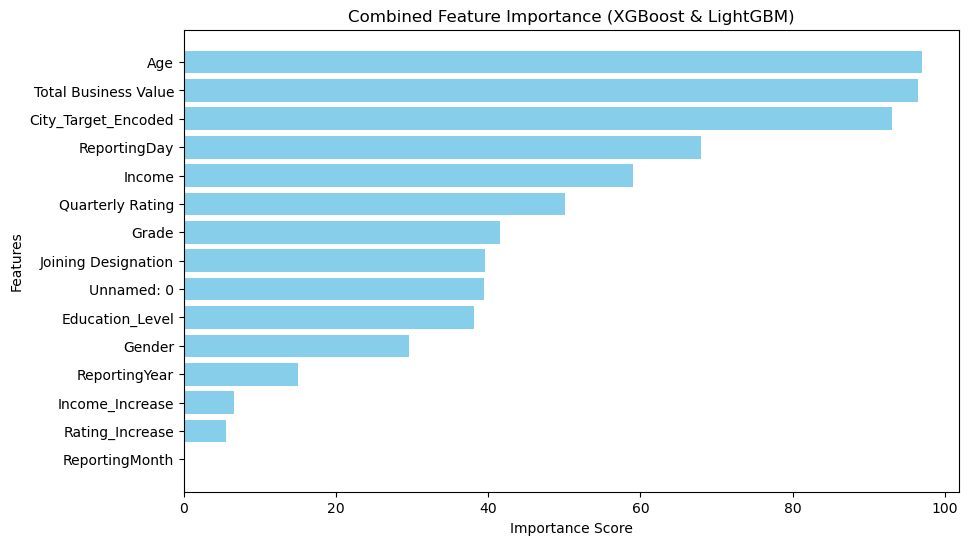

In [673]:
# Get feature importances from both models
xgb_importance = xgb_model.feature_importances_
lgb_importance = lgb_model.feature_importances_

# Average the importances (you could also sum them)
combined_importance = (xgb_importance + lgb_importance) / 2

# Create a DataFrame, excluding the 'Target' column
features = df.drop(columns=["Target"]).columns  # Exclude the 'Target' column
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': combined_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the combined feature importance with feature names
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Combined Feature Importance (XGBoost & LightGBM)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

#### median income of drivers is 60087.00; there are a few drivers who earn as much as 150000.00 and more
#### drivers having better grade are earning more income
#### we have almost same number of drivers across different education leve
#### Percentage of attrition for male drivers: 8.54% ; Percentage of attrition for female drivers: 8.36 
#### Overall percentage of attrition: 8.46%
#### drivers: total_males   =  11087 ; total_females=:  7981%ls
#### number of drivers who earn more than 100000.00 is also significant
#### missing value imputation is done. however outlier treatment is not done...
#### As per vanilla decision tree dtc7, Quarterly rating, Total business value, Education Level, Income increase (engineered feature), Gender are the top features
#### based on combined (xgboost and lightgbm) feature importances: age, business value, city, reporting day, income, quarterly rating are the top factors
#### Gender based EDA would have given more insights (which is not done in this notebook)
#### plain vanilla decision tree is already giving good scores (accuracy=0.92 and f1-score 0.92)
#### "min_impurity_decrease" looks like a better hyperparameter compared to others (like max_depth, min_samples_split, min_samples_leaf etc)
#### dtc7 looks to be a good choice with accuracy=0.887 and f1-score=0.88 and also explainability will be good


#### plain vanilla Random Forest classifier: accuracy: 0.942062130741376; f1-score:0.94 (Test set based); scores are already good and even after hyperparameter tuning and using xgboost , lightGBM and stacking did not result in significant improvement in the model performance.
#### Random Forest classifier: gridsearchCV accuracy: 0.9363324437666793; f1-score:0.94 (slightly better than randomisedsearchCV)
#### Random Forest classifier: RandomisedsearchCV Accuracy: 0.9361418223408311; f1-score: 0.94


#### Test Set Performance for GridSearchCV XGBoost: Accuracy: 0.9483514389174766; f1-score: 0.95 slightly better than RandomizedSearchCV XGBoost
#### Test Set Performance for Vanilla XGBoost: Accuracy: 0.9483514389174766; f1-score: 0.95
#### Vanilla xgboost is already optimised to the extent such that gridsearchCV and randomisedsearchCV are not showing any better performance indicators



#### Test Set Performance for GridSearchCV LightGBM: Accuracy: 0.9510196302649133 f1 score: 0.95 slightly better than RandomizedSearchCV LightGBM
#### Test Set Performance for RandomizedSearchCV LightGBM: Accuracy: 0.0.9500667047836859 f1 score: 0.95 slightly better than RandomizedSearchCV LightGBM

#### Test Set Performance for Stacking Classifier with Simple Models: Accuracy: 0.947970268724985; f1-score=0.95
#### stacking did not result any significant improvement in the performance

#### I have not done one hot encoding of categorical features where ordinal data was available. 


#### (I gave more importance to model building and comparing the models rather than on bringing out the business insights. I know at the end of teh day business insights are important. But for me , right-now building models (practicing ML hands on) is more important... I would appreciate valuable suggestions for improvement)



